<center>

# **Proyecto Final**
## **CARDIOVASCULAR DISEASE PREDICTION**
### Modelos II
### Universidad de Antioquia  
### Grupo 25

<img src="https://www.udea.edu.co/wps/wcm/connect/udea/2288a382-341c-41ee-9633-702a83d5ad2b/logosimbolo-horizontal-png.png?MOD=AJPERES&CVID=ljeSAX9" alt="Logo UdeA" width="400">

---

### **Integrantes**
Juan Pablo Valencia Martínez

Robert Alexander Blandon Rincón  

</center>


## 1 Carga y verificación de datos

### Imports y Librerias

In [ ]:
# LIBRERÍAS PRINCIPALES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')

# MACHINE LEARNING - SKLEARN
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

# MÉTRICAS DE EVALUACIÓN
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, precision_score,
                            recall_score, classification_report, confusion_matrix,
                            roc_curve, precision_recall_curve, average_precision_score)

# MODELOS DE MACHINE LEARNING
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# REDUCCIÓN DE DIMENSIÓN
from sklearn.decomposition import PCA
import umap

# ESTADÍSTICAS
from scipy import stats
from scipy.stats import randint, uniform

# MANEJO DE ARCHIVOS
import io
from google.colab import files
import zipfile
import os

# CONFIGURACIÓN DE VISUALIZACIÓN
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Kaggle
!pip install -q kaggle

print("TODAS LAS LIBRERÍAS IMPORTADAS CORRECTAMENTE")

TODAS LAS LIBRERÍAS IMPORTADAS CORRECTAMENTE


### Carga del dataset

In [ ]:
# Subir el archivo kaggle.json
uploaded = files.upload()

# Crear directorio .kaggle y mover el archivo
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print(" Credenciales de Kaggle configuradas correctamente")

# Descargar el dataset
print(" Descargando dataset Cardiovascular Disease...")
!kaggle datasets download -d sulianova/cardiovascular-disease-dataset

# Descomprimir el archivo
import zipfile

with zipfile.ZipFile('cardiovascular-disease-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

print(" Dataset descargado y descomprimido exitosamente")

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
 Credenciales de Kaggle configuradas correctamente
 Descargando dataset Cardiovascular Disease...
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
 Dataset descargado y descomprimido exitosamente


### Verificacion del dataset

In [ ]:
# Cargar el dataset
df = pd.read_csv('cardio_train.csv', sep=';')

print("DATASET CARGADO EXITOSAMENTE")

# Información general del dataset
print("\n INFORMACIÓN GENERAL:")
print(f"   • Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"   • Memoria usada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • Variables: {list(df.columns)}")

# Verificar valores nulos
print(f"\n CALIDAD DE DATOS:")
print(f"   • Valores nulos totales: {df.isnull().sum().sum()}")
print(f"   • Duplicados: {df.duplicated().sum()}")

# Tipos de datos
print(f"\n TIPOS DE DATOS:")
print(df.dtypes)

# Primeras filas
print(f"\n MUESTRA DE DATOS - Primeras 5 filas:")
print(df.head())

DATASET CARGADO EXITOSAMENTE

 INFORMACIÓN GENERAL:
   • Dimensiones: 70,000 filas × 13 columnas
   • Memoria usada: 6.94 MB
   • Variables: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

 CALIDAD DE DATOS:
   • Valores nulos totales: 0
   • Duplicados: 0

 TIPOS DE DATOS:
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

 MUESTRA DE DATOS - Primeras 5 filas:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70        

### Estadistica descriptiva del dataset

In [ ]:
# Estadísticas generales
print("📈 ESTADÍSTICAS GENERALES:")
print(df.describe())

# Variables numéricas específicas
numeric_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
print(f"\n🔢 VARIABLES NUMÉRICAS PRINCIPALES:")

for var in numeric_vars:
    print(f"\n   {var.upper()}:")
    print(f"      Mínimo: {df[var].min()}")
    print(f"      Máximo: {df[var].max()}")
    print(f"      Media: {df[var].mean():.2f}")
    print(f"      Mediana: {df[var].median():.2f}")
    print(f"      Desviación: {df[var].std():.2f}")
    print(f"      Valores únicos: {df[var].nunique()}")

📈 ESTADÍSTICAS GENERALES:
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    18


🎯 1.4. ANÁLISIS DE LA VARIABLE OBJETIVO (cardio)
----------------------------------------
📊 DISTRIBUCIÓN DE ENFERMEDAD CARDIOVASCULAR:
   • Clase 0 (Sin ECV): 35,021 pacientes (50.03%)
   • Clase 1 (Con ECV): 34,979 pacientes (49.97%)


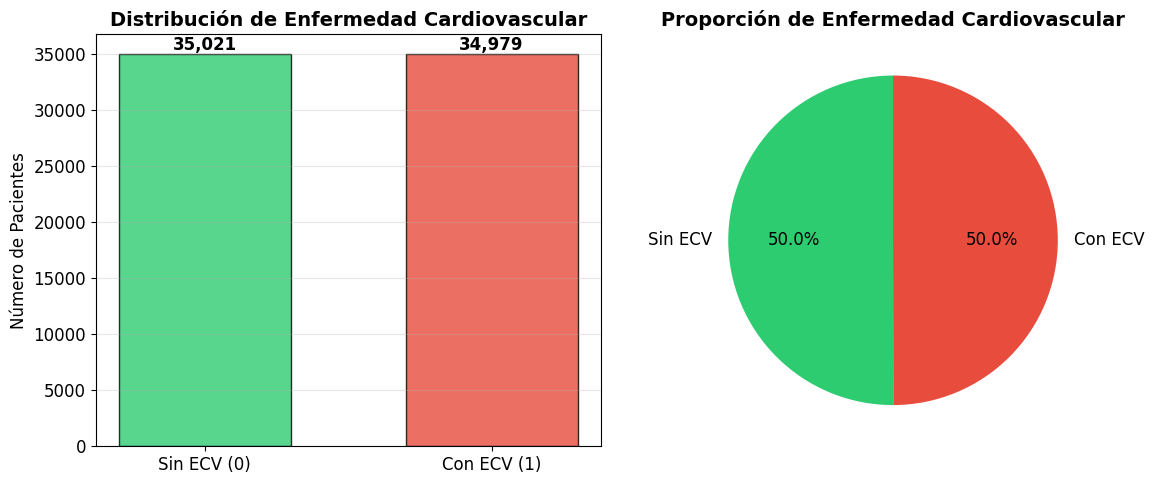


📅 EDAD DE LOS PACIENTES (convertida a años):
   • Edad mínima: 29 años
   • Edad máxima: 64 años
   • Edad promedio: 52.8 años
   • Desviación estándar: 6.8 años


In [ ]:
# Distribución de la variable objetivo
cardio_dist = df['cardio'].value_counts().sort_index()
cardio_perc = df['cardio'].value_counts(normalize=True).sort_index() * 100

print(" DISTRIBUCIÓN DE ENFERMEDAD CARDIOVASCULAR:")
for i in [0, 1]:
    status = "Sin ECV" if i == 0 else "Con ECV"
    print(f"   • Clase {i} ({status}): {cardio_dist[i]:,} pacientes ({cardio_perc[i]:.2f}%)")

# Gráfico de distribución
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
bars = plt.bar(['Sin ECV (0)', 'Con ECV (1)'], cardio_dist.values,
               color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black', width=0.6)
plt.title('Distribución de Enfermedad Cardiovascular', fontsize=14, fontweight='bold')
plt.ylabel('Número de Pacientes', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie(cardio_dist.values, labels=['Sin ECV', 'Con ECV'],
        autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
        startangle=90, textprops={'fontsize': 12})
plt.title('Proporción de Enfermedad Cardiovascular', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Conversión de edad a años para mejor interpretación
df['edad_años'] = df['age'] // 365

print(f"\n EDAD DE LOS PACIENTES (convertida a años):")
print(f"   • Edad mínima: {df['edad_años'].min()} años")
print(f"   • Edad máxima: {df['edad_años'].max()} años")
print(f"   • Edad promedio: {df['edad_años'].mean():.1f} años")
print(f"   • Desviación estándar: {df['edad_años'].std():.1f} años")

### Visualizacion inicial

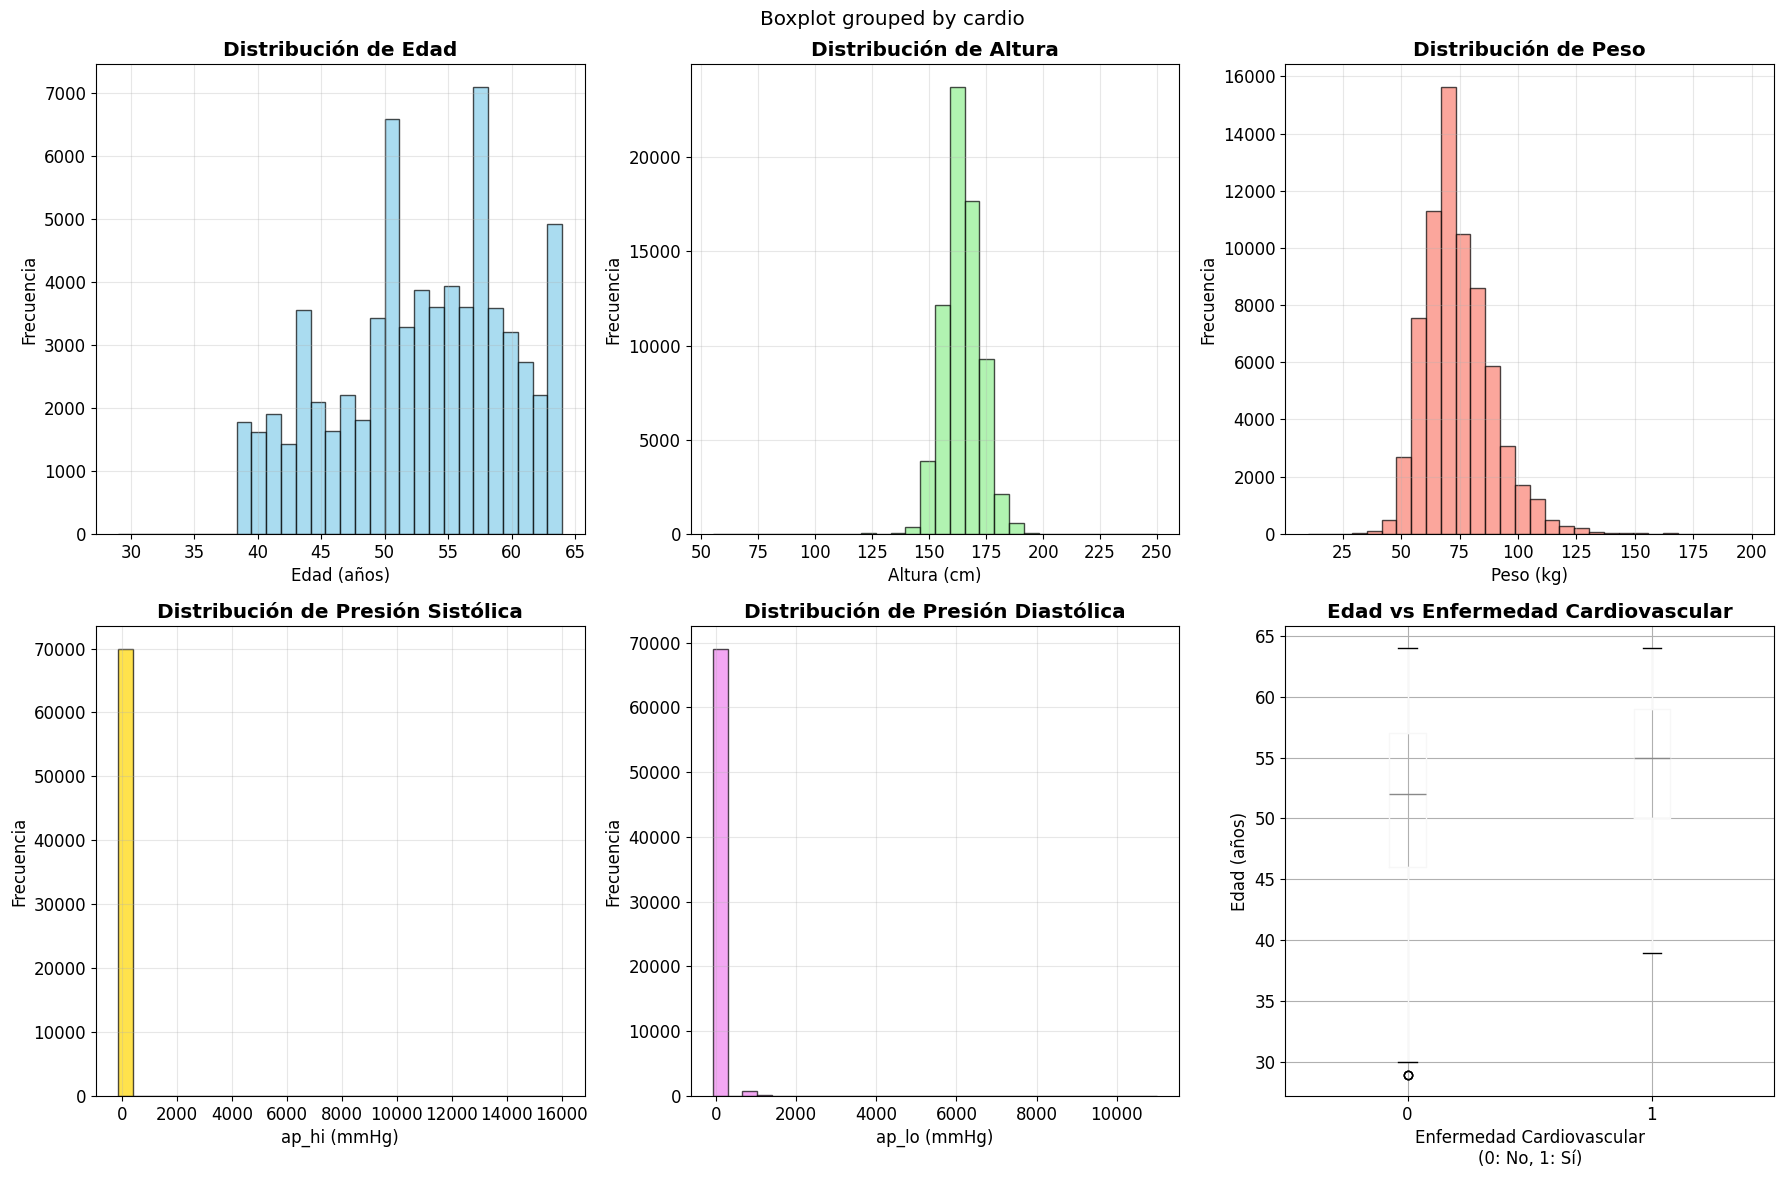


DATOS DESCARGADOS Y EXPLORADOS
RESUMEN:
   • Dataset: 70,000 pacientes, 14 variables
   • Balance: 50.0% sin ECV vs 50.0% con ECV
   • Rango edad: 29-64 años
   • Calidad datos: 0 nulos, 0 duplicados


In [ ]:
# Configuración de subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('ANÁLISIS EXPLORATORIO INICIAL - VARIABLES NUMÉRICAS',
             fontsize=16, fontweight='bold')

# 1. Distribución de edad
axes[0,0].hist(df['edad_años'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribución de Edad', fontweight='bold')
axes[0,0].set_xlabel('Edad (años)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].grid(True, alpha=0.3)

# 2. Distribución de altura
axes[0,1].hist(df['height'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0,1].set_title('Distribución de Altura', fontweight='bold')
axes[0,1].set_xlabel('Altura (cm)')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].grid(True, alpha=0.3)

# 3. Distribución de peso
axes[0,2].hist(df['weight'], bins=30, color='salmon', alpha=0.7, edgecolor='black')
axes[0,2].set_title('Distribución de Peso', fontweight='bold')
axes[0,2].set_xlabel('Peso (kg)')
axes[0,2].set_ylabel('Frecuencia')
axes[0,2].grid(True, alpha=0.3)

# 4. Distribución de presión sistólica
axes[1,0].hist(df['ap_hi'], bins=30, color='gold', alpha=0.7, edgecolor='black')
axes[1,0].set_title('Distribución de Presión Sistólica', fontweight='bold')
axes[1,0].set_xlabel('ap_hi (mmHg)')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].grid(True, alpha=0.3)

# 5. Distribución de presión diastólica
axes[1,1].hist(df['ap_lo'], bins=30, color='violet', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Distribución de Presión Diastólica', fontweight='bold')
axes[1,1].set_xlabel('ap_lo (mmHg)')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].grid(True, alpha=0.3)

# 6. Boxplot de edad por enfermedad cardiovascular
df.boxplot(column='edad_años', by='cardio', ax=axes[1,2])
axes[1,2].set_title('Edad vs Enfermedad Cardiovascular', fontweight='bold')
axes[1,2].set_xlabel('Enfermedad Cardiovascular\n(0: No, 1: Sí)')
axes[1,2].set_ylabel('Edad (años)')

plt.tight_layout()
plt.show()

print("\nDATOS DESCARGADOS Y EXPLORADOS")
print("=" * 60)
print("RESUMEN:")
print(f"   • Dataset: {df.shape[0]:,} pacientes, {df.shape[1]} variables")
print(f"   • Balance: {cardio_perc[0]:.1f}% sin ECV vs {cardio_perc[1]:.1f}% con ECV")
print(f"   • Rango edad: {df['edad_años'].min()}-{df['edad_años'].max()} años")
print(f"   • Calidad datos: {df.isnull().sum().sum()} nulos, {df.duplicated().sum()} duplicados")

## 2 Preproocesamiento de datos

### Limpieza de datos

In [ ]:
# Definir rangos clinicamente posibles para cada variable
rangos_clinicos = {
    'age': (6570, 36500),        # 18-100 años en dias
    'height': (100, 250),        # 100-250 cm
    'weight': (30, 200),         # 30-200 kg
    'ap_hi': (50, 250),          # 50-250 mmHg
    'ap_lo': (30, 200)           # 30-200 mmHg
}

print("BUSCANDO VALORES CLINICAMENTE IMPOSIBLES...")

# Contar valores fuera de rangos clinicos
valores_imposibles = {}
for var, (min_val, max_val) in rangos_clinicos.items():
    fuera_rango = df[(df[var] < min_val) | (df[var] > max_val)]
    valores_imposibles[var] = len(fuera_rango)
    print(f"   {var:10}: {len(fuera_rango):>5} valores fuera de rango [{min_val}-{max_val}]")

# Valores especificamente problematicos en presiones arteriales
print(f"\nVALORES ESPECIFICAMENTE PROBLEMATICOS:")
ap_hi_negativos = df[df['ap_hi'] < 0]
ap_lo_negativos = df[df['ap_lo'] < 0]
presiones_invertidas = df[df['ap_hi'] <= df['ap_lo']]

print(f"   Presiones sistolicas negativas: {len(ap_hi_negativos)}")
print(f"   Presiones diastolicas negativas: {len(ap_lo_negativos)}")
print(f"   ap_hi <= ap_lo (invertidas): {len(presiones_invertidas)}")

# Mostrar algunos ejemplos de valores imposibles
print(f"\nEJEMPLOS DE VALORES IMPOSIBLES:")
valores_raros = df[
    (df['ap_hi'] < 0) | (df['ap_hi'] > 250) |
    (df['ap_lo'] < 0) | (df['ap_lo'] > 200) |
    (df['height'] < 100) | (df['height'] > 250) |
    (df['weight'] < 30) | (df['weight'] > 200)
].head(3)

if len(valores_raros) > 0:
    print(valores_raros[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
else:
    print("   No se encontraron valores imposibles extremos")

BUSCANDO VALORES CLINICAMENTE IMPOSIBLES...
   age       :     0 valores fuera de rango [6570-36500]
   height    :    29 valores fuera de rango [100-250]
   weight    :     7 valores fuera de rango [30-200]
   ap_hi     :   228 valores fuera de rango [50-250]
   ap_lo     :  1006 valores fuera de rango [30-200]

VALORES ESPECIFICAMENTE PROBLEMATICOS:
   Presiones sistolicas negativas: 7
   Presiones diastolicas negativas: 1
   ap_hi <= ap_lo (invertidas): 1236

EJEMPLOS DE VALORES IMPOSIBLES:
       age  height  weight  ap_hi  ap_lo
224  21800      76    55.0    120     80
228  17489     183    98.0    160   1100
241  21932     157    60.0    160   1000


In [ ]:
print("DATASET ORIGINAL:")
print(f"   Filas: {len(df):,}")
print(f"   Columnas: {len(df.columns)}")

# Aplicar filtros de limpieza
df_clean = df[
    (df['ap_hi'] >= 50) & (df['ap_hi'] <= 250) &
    (df['ap_lo'] >= 30) & (df['ap_lo'] <= 200) &
    (df['ap_hi'] > df['ap_lo']) &  # Presion sistolica > diastolica
    (df['height'] >= 100) & (df['height'] <= 250) &
    (df['weight'] >= 30) & (df['weight'] <= 200) &
    (df['age'] >= 6570) & (df['age'] <= 36500)  # 18-100 años
]

print("\nDATASET LIMPIO:")
print(f"   Filas: {len(df_clean):,}")
print(f"   Columnas: {len(df_clean.columns)}")
print(f"   Filas eliminadas: {len(df) - len(df_clean):,}")
print(f"   Porcentaje eliminado: {((len(df) - len(df_clean))/len(df)*100):.2f}%")

# Verificar balance despues de limpieza
print(f"\nBALANCE DESPUES DE LIMPIEZA:")
cardio_clean_dist = df_clean['cardio'].value_counts()
cardio_clean_perc = df_clean['cardio'].value_counts(normalize=True) * 100

for i in [0, 1]:
    status = "Sin ECV" if i == 0 else "Con ECV"
    print(f"   Clase {i} ({status}): {cardio_clean_dist[i]:,} pacientes ({cardio_clean_perc[i]:.2f}%)")

DATASET ORIGINAL:
   Filas: 70,000
   Columnas: 14

DATASET LIMPIO:
   Filas: 68,646
   Columnas: 14
   Filas eliminadas: 1,354
   Porcentaje eliminado: 1.93%

BALANCE DESPUES DE LIMPIEZA:
   Clase 0 (Sin ECV): 34,684 pacientes (50.53%)
   Clase 1 (Con ECV): 33,962 pacientes (49.47%)


### Submuestreo

In [ ]:
tamaño_muestras = 20000

print(f"APLICANDO SUBMUESTREO A {tamaño_muestras} MUESTRAS...")

# Submuestreo estratificado para mantener proporciones
df_0 = df_clean[df_clean['cardio'] == 0]  # Sin enfermedad
df_1 = df_clean[df_clean['cardio'] == 1]  # Con enfermedad

print(f"   Pacientes sin ECV disponibles: {len(df_0):,}")
print(f"   Pacientes con ECV disponibles: {len(df_1):,}")

# Submuestreo de cada clase
df_0_sampled = resample(df_0,
                       n_samples=tamaño_muestras//2,
                       random_state=42,
                       replace=False)

df_1_sampled = resample(df_1,
                       n_samples=tamaño_muestras//2,
                       random_state=42,
                       replace=False)

# Combinar
df_sampled = pd.concat([df_0_sampled, df_1_sampled])

print(f"\nSUBMUESTREO COMPLETADO:")
print(f"   Dataset final: {len(df_sampled):,} muestras")
print(f"   Sin ECV: {len(df_0_sampled):,} muestras")
print(f"   Con ECV: {len(df_1_sampled):,} muestras")
print(f"   Balance: 50.0% vs 50.0%")

# Conversion de edad a años para analisis
df_sampled['edad_años'] = df_sampled['age'] // 365

print(f"\nESTADISTICAS DE EDAD EN MUESTRA:")
print(f"   Edad minima: {df_sampled['edad_años'].min()} años")
print(f"   Edad maxima: {df_sampled['edad_años'].max()} años")
print(f"   Edad promedio: {df_sampled['edad_años'].mean():.1f} años")

APLICANDO SUBMUESTREO A 20000 MUESTRAS...
   Pacientes sin ECV disponibles: 34,684
   Pacientes con ECV disponibles: 33,962

SUBMUESTREO COMPLETADO:
   Dataset final: 20,000 muestras
   Sin ECV: 10,000 muestras
   Con ECV: 10,000 muestras
   Balance: 50.0% vs 50.0%

ESTADISTICAS DE EDAD EN MUESTRA:
   Edad minima: 29 años
   Edad maxima: 64 años
   Edad promedio: 52.8 años


### Calidad post-limpieza

In [ ]:
# Verificar que no quedan valores imposibles
print("VERIFICANDO RANGOS CLINICOS...")

problemas_detectados = 0
for var, (min_val, max_val) in rangos_clinicos.items():
    if var in ['ap_hi', 'ap_lo']:  # Para presiones, usar rangos mas estrictos
        if var == 'ap_hi':
            min_val, max_val = 50, 250
        else:
            min_val, max_val = 30, 200

    fuera_rango = df_sampled[(df_sampled[var] < min_val) | (df_sampled[var] > max_val)]
    if len(fuera_rango) > 0:
        print(f"   ERROR: {var} tiene {len(fuera_rango)} valores fuera de rango")
        problemas_detectados += 1
    else:
        print(f"   OK: {var} dentro de rango [{min_val}-{max_val}]")

# Verificar presiones arteriales
presiones_ok = len(df_sampled[df_sampled['ap_hi'] > df_sampled['ap_lo']]) == len(df_sampled)
if presiones_ok:
    print("   OK: Todas las presiones sistolicas > diastolicas")
else:
    print("   ERROR: Hay presiones invertidas")
    problemas_detectados += 1

# Verificar balance
balance_ok = abs(len(df_0_sampled) - len(df_1_sampled)) <= 1
if balance_ok:
    print("   OK: Dataset perfectamente balanceado")
else:
    print("   ERROR: Dataset desbalanceado")
    problemas_detectados += 1

print(f"\nRESUMEN CALIDAD:")
print(f"   Problemas detectados: {problemas_detectados}")
print(f"   Estado: {'LISTO PARA MODELADO' if problemas_detectados == 0 else 'REVISION REQUERIDA'}")

# Mostrar estadisticas finales
print(f"\nESTADISTICAS FINALES DEL DATASET:")
print(f"   Total muestras: {len(df_sampled):,}")
print(f"   Variables: {len(df_sampled.columns)}")
print(f"   Sin ECV: {len(df_0_sampled):,} (50.0%)")
print(f"   Con ECV: {len(df_1_sampled):,} (50.0%)")
print(f"   Edad promedio: {df_sampled['edad_años'].mean():.1f} años")

VERIFICANDO RANGOS CLINICOS...
   OK: age dentro de rango [6570-36500]
   OK: height dentro de rango [100-250]
   OK: weight dentro de rango [30-200]
   OK: ap_hi dentro de rango [50-250]
   OK: ap_lo dentro de rango [30-200]
   OK: Todas las presiones sistolicas > diastolicas
   OK: Dataset perfectamente balanceado

RESUMEN CALIDAD:
   Problemas detectados: 0
   Estado: LISTO PARA MODELADO

ESTADISTICAS FINALES DEL DATASET:
   Total muestras: 20,000
   Variables: 14
   Sin ECV: 10,000 (50.0%)
   Con ECV: 10,000 (50.0%)
   Edad promedio: 52.8 años


### Visualizacion post-limpieza

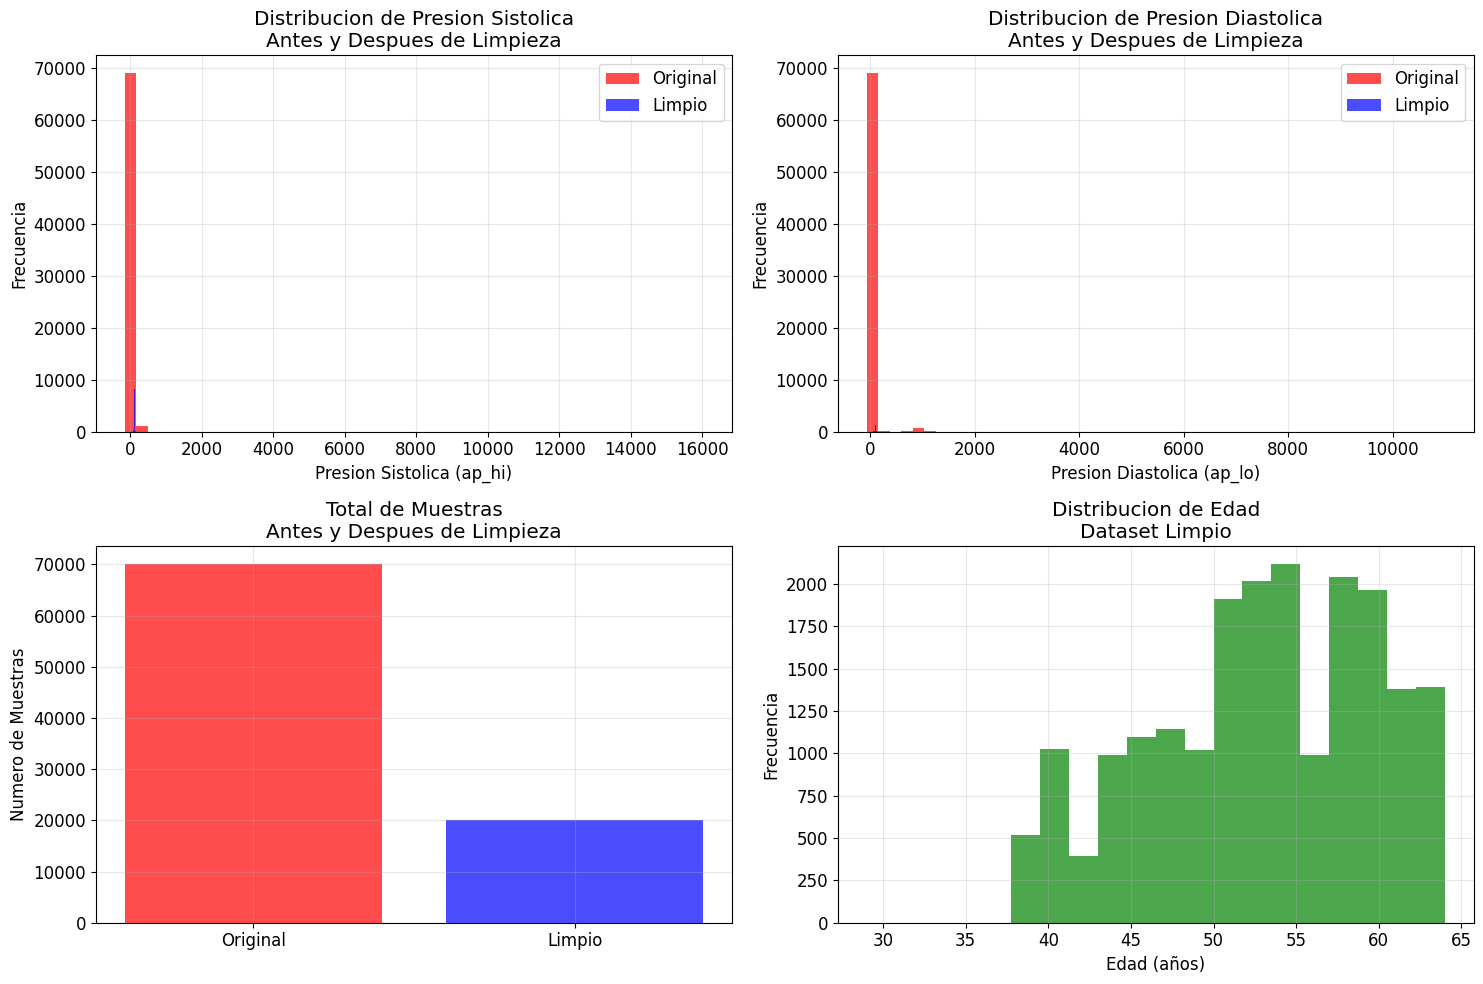

SECCION 2 COMPLETADA - DATOS LIMPIOS Y PREPARADOS
RESUMEN:
   Dataset original: 70,000 muestras
   Dataset limpio: 68,646 muestras
   Dataset final: 20,000 muestras
   Muestras eliminadas: 50,000
   Balance final: 50.0% vs 50.0%
   Calidad: 0 problemas detectados


In [ ]:
# Comparar distribuciones antes y despues de la limpieza
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Comparacion de presion sistolica
axes[0,0].hist(df['ap_hi'], bins=50, alpha=0.7, label='Original', color='red')
axes[0,0].hist(df_sampled['ap_hi'], bins=30, alpha=0.7, label='Limpio', color='blue')
axes[0,0].set_xlabel('Presion Sistolica (ap_hi)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].set_title('Distribucion de Presion Sistolica\nAntes y Despues de Limpieza')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Comparacion de presion diastolica
axes[0,1].hist(df['ap_lo'], bins=50, alpha=0.7, label='Original', color='red')
axes[0,1].hist(df_sampled['ap_lo'], bins=30, alpha=0.7, label='Limpio', color='blue')
axes[0,1].set_xlabel('Presion Diastolica (ap_lo)')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].set_title('Distribucion de Presion Diastolica\nAntes y Despues de Limpieza')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Balance de clases
axes[1,0].bar(['Original', 'Limpio'],
              [len(df), len(df_sampled)],
              color=['red', 'blue'], alpha=0.7)
axes[1,0].set_ylabel('Numero de Muestras')
axes[1,0].set_title('Total de Muestras\nAntes y Despues de Limpieza')
axes[1,0].grid(True, alpha=0.3)

# 4. Distribucion de edad
axes[1,1].hist(df_sampled['edad_años'], bins=20, color='green', alpha=0.7)
axes[1,1].set_xlabel('Edad (años)')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].set_title('Distribucion de Edad\nDataset Limpio')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("SECCION 2 COMPLETADA - DATOS LIMPIOS Y PREPARADOS")
print("=" * 60)
print("RESUMEN:")
print(f"   Dataset original: {len(df):,} muestras")
print(f"   Dataset limpio: {len(df_clean):,} muestras")
print(f"   Dataset final: {len(df_sampled):,} muestras")
print(f"   Muestras eliminadas: {len(df) - len(df_sampled):,}")
print(f"   Balance final: 50.0% vs 50.0%")
print(f"   Calidad: {problemas_detectados} problemas detectados")

## 3 Analisis de datos

### Analisis variables numericas

ESTADISTICAS DE VARIABLES NUMERICAS:

AGE            
   Min: 10859.00    Max: 23678.00
   Media: 19452.89    Mediana: 19689.00
   Std:  2471.14    CV:  12.70%

HEIGHT         
   Min:   104.00    Max:   198.00
   Media:  164.46    Mediana:  165.00
   Std:     8.02    CV:   4.88%

WEIGHT         
   Min:    32.00    Max:   180.00
   Media:   74.20    Mediana:   72.00
   Std:    14.24    CV:  19.18%

AP_HI          
   Min:    60.00    Max:   240.00
   Media:  126.75    Mediana:  120.00
   Std:    16.74    CV:  13.21%

AP_LO          
   Min:    30.00    Max:   170.00
   Media:   81.39    Mediana:   80.00
   Std:     9.49    CV:  11.67%

MATRIZ DE CORRELACION...


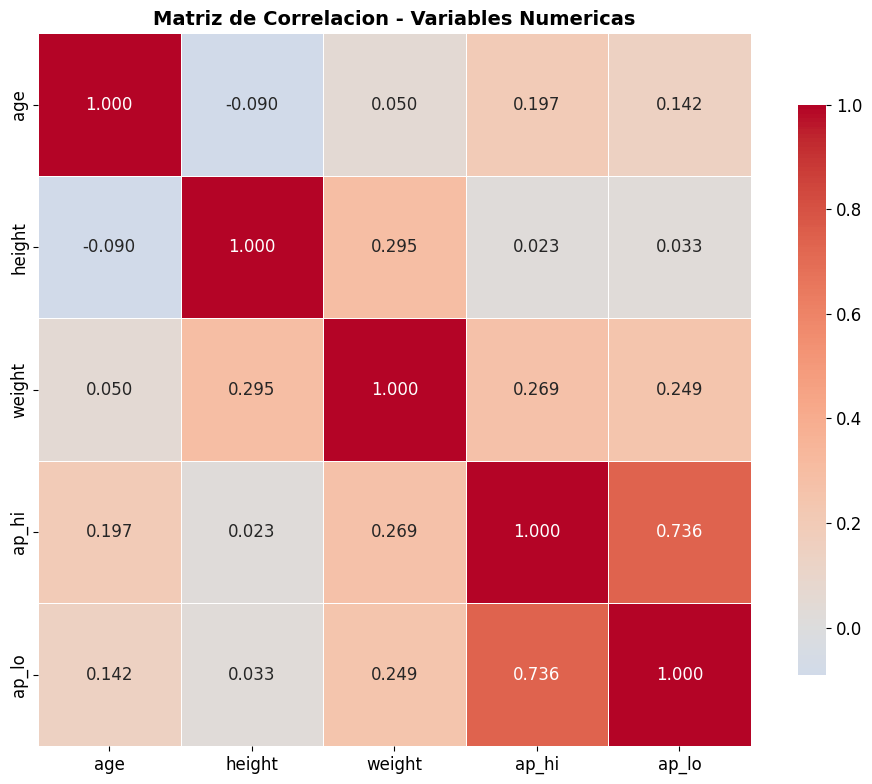

In [ ]:
# Preparar datos para analisis
X = df_sampled.drop(['cardio', 'id', 'edad_años'], axis=1)
y = df_sampled['cardio']

# Variables numericas para analisis
numeric_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

print("ESTADISTICAS DE VARIABLES NUMERICAS:")
for var in numeric_vars:
    print(f"\n{var.upper():15}")
    print(f"   Min: {X[var].min():8.2f}    Max: {X[var].max():8.2f}")
    print(f"   Media: {X[var].mean():7.2f}    Mediana: {X[var].median():7.2f}")
    print(f"   Std: {X[var].std():8.2f}    CV: {(X[var].std()/X[var].mean()*100):6.2f}%")

# Matriz de correlacion
print("\nMATRIZ DE CORRELACION...")
correlation_matrix = X[numeric_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlacion - Variables Numericas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Correlacion con la variable objetivo (Cardio)

CORRELACION CON ENFERMEDAD CARDIOVASCULAR:
--------------------------------------------------
   ap_hi           :  0.4271 (positiva)
   ap_lo           :  0.3457 (positiva)
   age             :  0.2380 (positiva)
   weight          :  0.1827 (positiva)
   height          : -0.0086 (negativa)

VARIABLES CANDIDATAS A ELIMINAR (correlacion < 0.01):
   - height (correlacion: -0.0086)


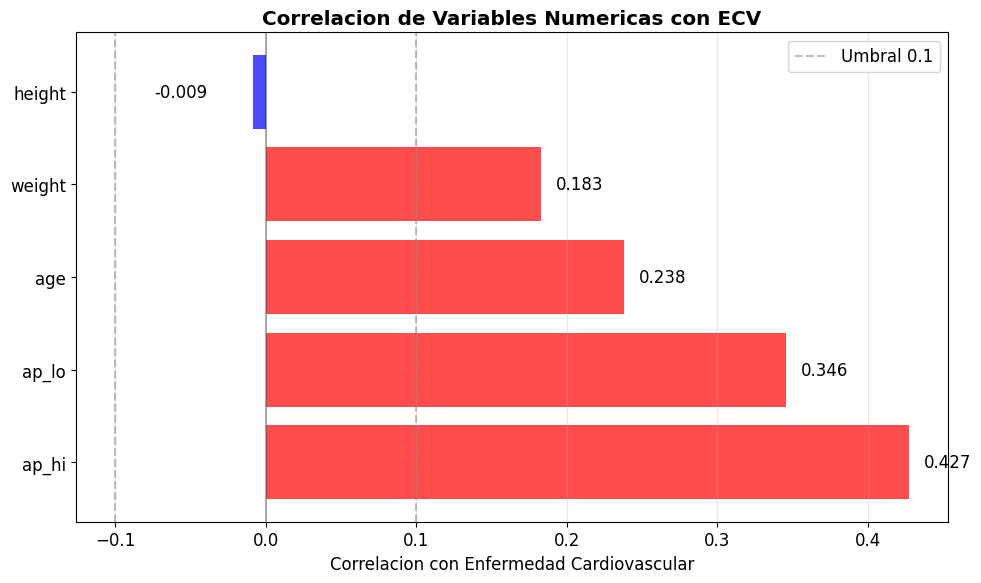

In [ ]:
# Analisis de correlacion con enfermedad cardiovascular
correlation_with_target = []
for column in numeric_vars:
    corr = np.corrcoef(X[column], y)[0, 1]
    correlation_with_target.append((column, corr))

# Ordenar por correlacion absoluta
correlation_with_target.sort(key=lambda x: abs(x[1]), reverse=True)

print("CORRELACION CON ENFERMEDAD CARDIOVASCULAR:")
print("-" * 50)
for var, corr in correlation_with_target:
    direccion = "positiva" if corr > 0 else "negativa"
    print(f"   {var:15} : {corr:7.4f} ({direccion})")

# Identificar variables candidatas para eliminacion
umbral_correlacion = 0.01
variables_baja_corr = [var for var, corr in correlation_with_target if abs(corr) < umbral_correlacion]

print(f"\nVARIABLES CANDIDATAS A ELIMINAR (correlacion < {umbral_correlacion}):")
if variables_baja_corr:
    for var in variables_baja_corr:
        corr_val = next(corr for v, corr in correlation_with_target if v == var)
        print(f"   - {var} (correlacion: {corr_val:.4f})")
else:
    print("   No se identificaron variables con correlacion muy baja")

# Grafico de correlaciones
plt.figure(figsize=(10, 6))
variables = [item[0] for item in correlation_with_target]
correlaciones = [item[1] for item in correlation_with_target]
colors = ['red' if x > 0 else 'blue' for x in correlaciones]

bars = plt.barh(variables, correlaciones, color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=0.1, color='gray', linestyle='--', alpha=0.5, label='Umbral 0.1')
plt.axvline(x=-0.1, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Correlacion con Enfermedad Cardiovascular')
plt.title('Correlacion de Variables Numericas con ECV', fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.01 if width >= 0 else -0.03), bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left' if width >= 0 else 'right', va='center')

plt.legend()
plt.tight_layout()
plt.show()

### Analisis variables categoricas


GENDER         
   Valor 1 (Mujer): 12986 ( 64.9%)
   Valor 2 (Hombre):  7014 ( 35.1%)

CHOLESTEROL    
   Valor 1 (Normal): 14916 ( 74.6%)
   Valor 2 (Alto):  2776 ( 13.9%)
   Valor 3 (Muy alto):  2308 ( 11.5%)

GLUC           
   Valor 1 (Normal): 16935 ( 84.7%)
   Valor 2 (Alto):  1527 (  7.6%)
   Valor 3 (Muy alto):  1538 (  7.7%)

SMOKE          
   Valor 0 (No): 18270 ( 91.3%)
   Valor 1 (Si):  1730 (  8.6%)

ALCO           
   Valor 0 (No): 18916 ( 94.6%)
   Valor 1 (Si):  1084 (  5.4%)

ACTIVE         
   Valor 0 (No):  3941 ( 19.7%)
   Valor 1 (Si): 16059 ( 80.3%)


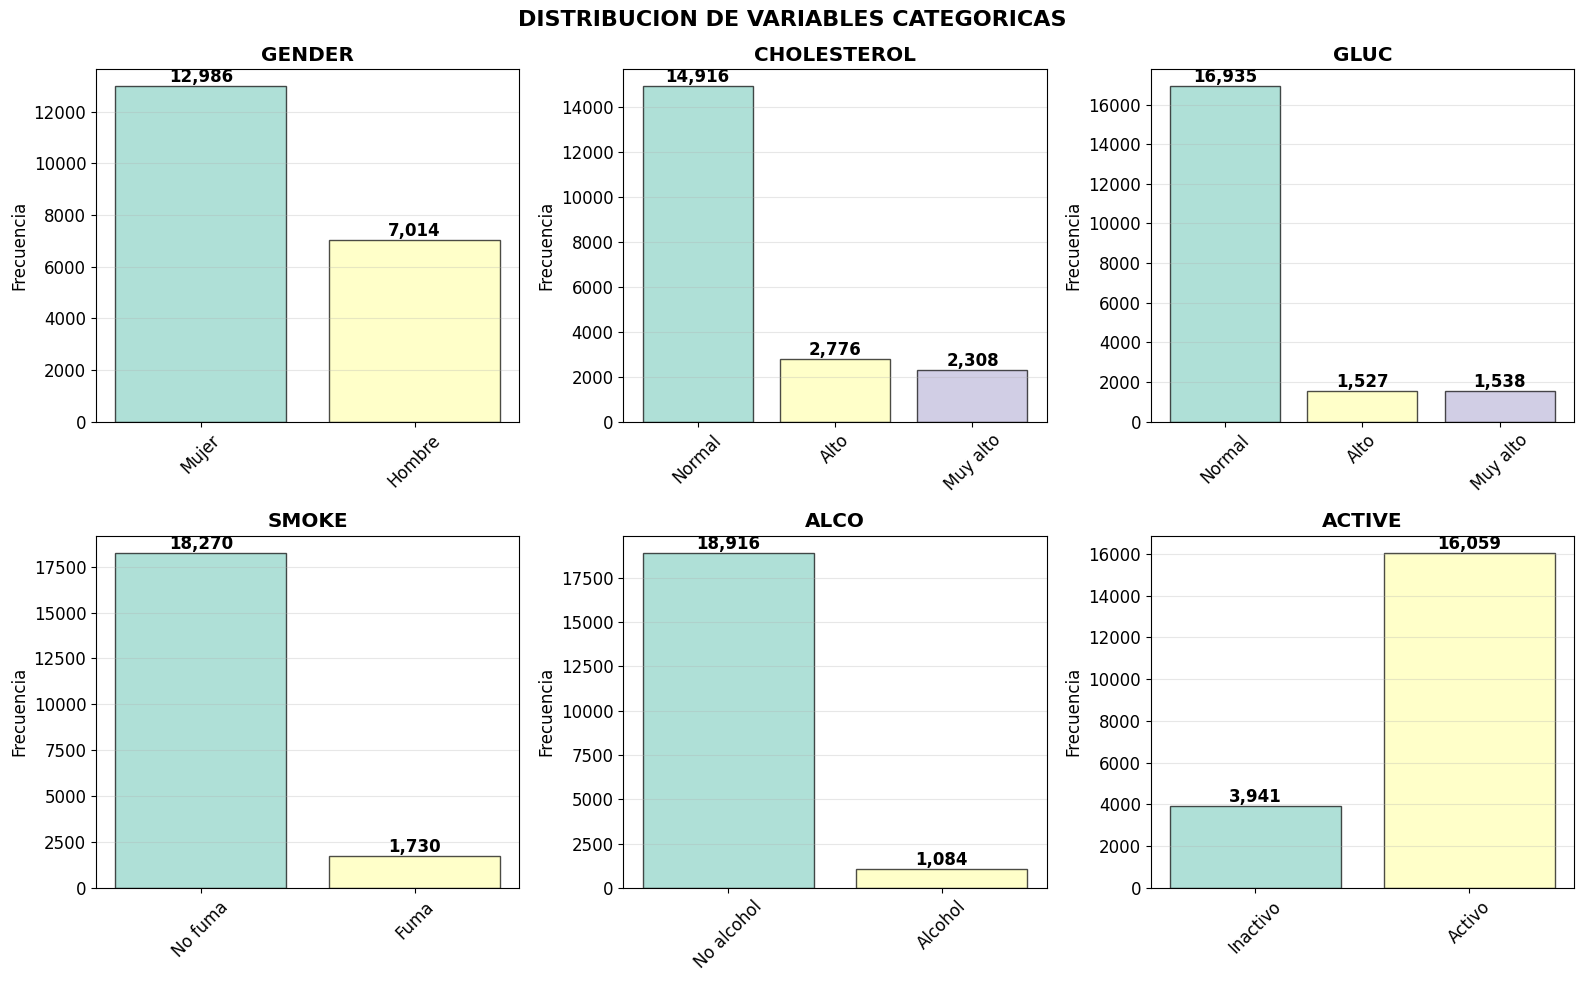

In [ ]:
categorical_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

for var in categorical_vars:
    print(f"\n{var.upper():15}")
    value_counts = X[var].value_counts().sort_index()
    total = len(X)

    for val, count in value_counts.items():
        percentage = (count / total) * 100
        # Definir significado de los valores
        if var == 'gender':
            significado = "Mujer" if val == 1 else "Hombre" if val == 2 else str(val)
        elif var == 'cholesterol':
            significado = "Normal" if val == 1 else "Alto" if val == 2 else "Muy alto" if val == 3 else str(val)
        elif var == 'gluc':
            significado = "Normal" if val == 1 else "Alto" if val == 2 else "Muy alto" if val == 3 else str(val)
        elif var in ['smoke', 'alco', 'active']:
            significado = "Si" if val == 1 else "No"
        else:
            significado = str(val)

        print(f"   Valor {val} ({significado}): {count:>5} ({percentage:5.1f}%)")

# Graficos de distribucion categoricas
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('DISTRIBUCION DE VARIABLES CATEGORICAS', fontsize=16, fontweight='bold')

for i, var in enumerate(categorical_vars):
    row, col = i // 3, i % 3

    # Calcular distribucion
    counts = X[var].value_counts().sort_index()

    # Crear etiquetas significativas
    if var == 'gender':
        labels = ['Mujer', 'Hombre']
    elif var == 'cholesterol':
        labels = ['Normal', 'Alto', 'Muy alto']
    elif var == 'gluc':
        labels = ['Normal', 'Alto', 'Muy alto']
    elif var == 'smoke':
        labels = ['No fuma', 'Fuma']
    elif var == 'alco':
        labels = ['No alcohol', 'Alcohol']
    elif var == 'active':
        labels = ['Inactivo', 'Activo']
    else:
        labels = [str(x) for x in counts.index]

    # Grafico de barras
    bars = axes[row, col].bar(range(len(counts)), counts.values,
                             color=plt.cm.Set3(np.arange(len(counts))),
                             alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{var.upper()}', fontweight='bold')
    axes[row, col].set_xticks(range(len(counts)))
    axes[row, col].set_xticklabels(labels, rotation=45)
    axes[row, col].set_ylabel('Frecuencia')
    axes[row, col].grid(True, alpha=0.3, axis='y')

    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Analisis de relacion con la variable objetivo (cardio)


GENDER         
   Mujer          :  50.4% sin ECV,  49.6% con ECV
   Hombre         :  49.3% sin ECV,  50.7% con ECV

CHOLESTEROL    
   Normal         :  55.9% sin ECV,  44.1% con ECV
   Alto           :  40.6% sin ECV,  59.4% con ECV
   Muy alto       :  23.3% sin ECV,  76.7% con ECV

GLUC           
   Normal         :  51.9% sin ECV,  48.1% con ECV
   Alto           :  41.0% sin ECV,  59.0% con ECV
   Muy alto       :  37.7% sin ECV,  62.3% con ECV

SMOKE          
   No fuma        :  49.7% sin ECV,  50.3% con ECV
   Fuma           :  53.2% sin ECV,  46.8% con ECV

ALCO           
   No alcohol     :  49.9% sin ECV,  50.1% con ECV
   Alcohol        :  52.6% sin ECV,  47.4% con ECV

ACTIVE         
   Inactivo       :  45.5% sin ECV,  54.5% con ECV
   Activo         :  51.1% sin ECV,  48.9% con ECV


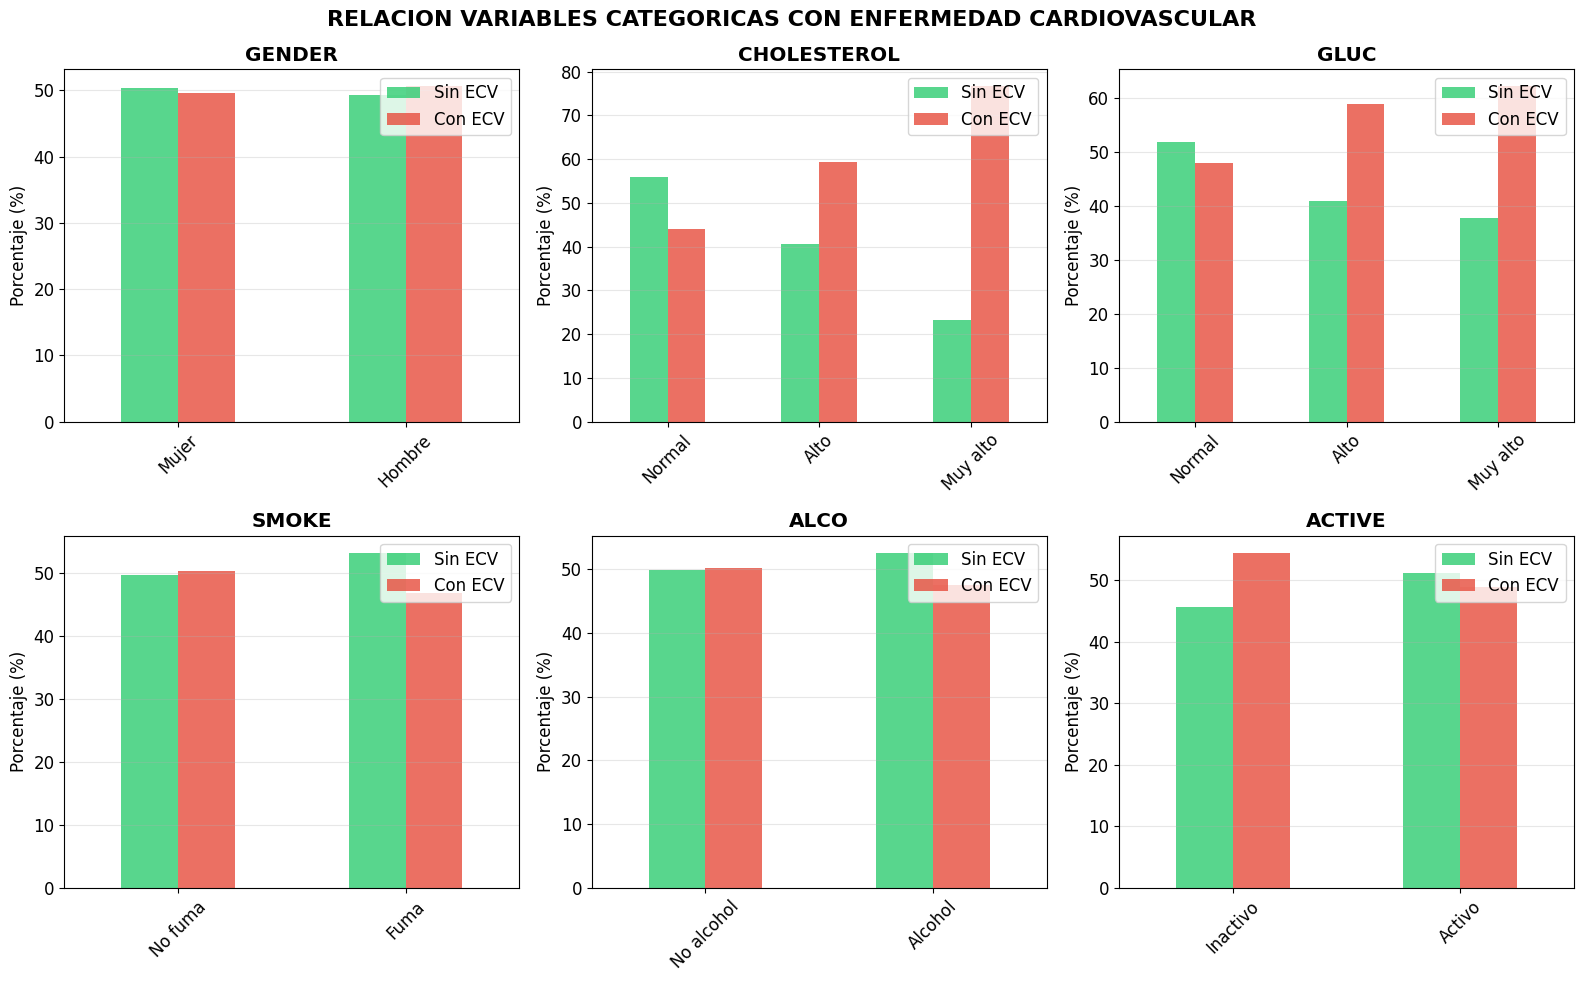

In [ ]:
# Crear DataFrame combinado para analisis
df_analysis = X.copy()
df_analysis['cardio'] = y

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('RELACION VARIABLES CATEGORICAS CON ENFERMEDAD CARDIOVASCULAR',
             fontsize=16, fontweight='bold')

for i, var in enumerate(categorical_vars):
    row, col = i // 3, i % 3

    # Calcular tabla de contingencia
    contingency_table = pd.crosstab(df_analysis[var], df_analysis['cardio'],
                                   normalize='index') * 100

    # Crear etiquetas
    if var == 'gender':
        labels = ['Mujer', 'Hombre']
    elif var == 'cholesterol':
        labels = ['Normal', 'Alto', 'Muy alto']
    elif var == 'gluc':
        labels = ['Normal', 'Alto', 'Muy alto']
    elif var == 'smoke':
        labels = ['No fuma', 'Fuma']
    elif var == 'alco':
        labels = ['No alcohol', 'Alcohol']
    elif var == 'active':
        labels = ['Inactivo', 'Activo']
    else:
        labels = [str(x) for x in contingency_table.index]

    # Grafico de barras apiladas
    bars = contingency_table.plot(kind='bar', ax=axes[row, col],
                                 color=['#2ecc71', '#e74c3c'], alpha=0.8)
    axes[row, col].set_title(f'{var.upper()}', fontweight='bold')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Porcentaje (%)')
    axes[row, col].set_xticklabels(labels, rotation=45)
    axes[row, col].legend(['Sin ECV', 'Con ECV'], loc='upper right')
    axes[row, col].grid(True, alpha=0.3, axis='y')

    # Mostrar porcentajes en consola
    print(f"\n{var.upper():15}")
    for idx, valor in enumerate(contingency_table.index):
        sin_ecv = contingency_table.loc[valor, 0]
        con_ecv = contingency_table.loc[valor, 1]
        label = labels[idx]
        print(f"   {label:15}: {sin_ecv:5.1f}% sin ECV, {con_ecv:5.1f}% con ECV")

plt.tight_layout()
plt.show()

### Resumen del analisis

In [ ]:
print("HALLAZGOS PRINCIPALES:")
print("-" * 30)

# Variables mas correlacionadas con ECV
print("\n1. VARIABLES MAS PREDICTIVAS (correlacion numerica):")
top_variables = sorted(correlation_with_target, key=lambda x: abs(x[1]), reverse=True)[:3]
for var, corr in top_variables:
    print(f"   • {var:10}: {corr:.4f}")

# Variables categoricas con mayor diferencia
print("\n2. VARIABLES CATEGORICAS CON MAYOR IMPACTO:")
print("   (Diferencia en porcentaje de ECV entre categorias)")

impacto_categorico = []
for var in categorical_vars:
    contingency = pd.crosstab(df_analysis[var], df_analysis['cardio'], normalize='index') * 100
    if len(contingency) > 1:
        max_diff = abs(contingency[1].max() - contingency[1].min())
        impacto_categorico.append((var, max_diff))

# Ordenar por impacto
impacto_categorico.sort(key=lambda x: x[1], reverse=True)

for var, diff in impacto_categorico[:3]:
    print(f"   • {var:15}: {diff:.1f}% diferencia")

# Variables con baja correlacion
print("\n3. VARIABLES CON BAJA CORRELACION:")
if variables_baja_corr:
    for var in variables_baja_corr:
        corr_val = next(corr for v, corr in correlation_with_target if v == var)
        print(f"   • {var:15}: {corr_val:.4f} (candidata a eliminacion)")
else:
    print("   • No se identificaron variables con correlacion muy baja")

# Balance del dataset
print("\n4. BALANCE DEL DATASET:")
print(f"   • Total muestras: {len(df_sampled):,}")
print(f"   • Sin ECV: {len(df_sampled[df_sampled['cardio'] == 0]):,} (50.0%)")
print(f"   • Con ECV: {len(df_sampled[df_sampled['cardio'] == 1]):,} (50.0%)")

print("\n ANALISIS TERMINADO")
print("=" * 60)
print("RESUMEN:")
print(f"   • Variables analizadas: {len(numeric_vars) + len(categorical_vars)}")
print(f"   • Predictores principales: {top_variables[0][0]}, {top_variables[1][0]}")
print(f"   • Variables candidatas a eliminar: {len(variables_baja_corr)}")
print(f"   • Calidad datos: Excelente para modelado")

HALLAZGOS PRINCIPALES:
------------------------------

1. VARIABLES MAS PREDICTIVAS (correlacion numerica):
   • ap_hi     : 0.4271
   • ap_lo     : 0.3457
   • age       : 0.2380

2. VARIABLES CATEGORICAS CON MAYOR IMPACTO:
   (Diferencia en porcentaje de ECV entre categorias)
   • cholesterol    : 32.6% diferencia
   • gluc           : 14.2% diferencia
   • active         : 5.5% diferencia

3. VARIABLES CON BAJA CORRELACION:
   • height         : -0.0086 (candidata a eliminacion)

4. BALANCE DEL DATASET:
   • Total muestras: 20,000
   • Sin ECV: 10,000 (50.0%)
   • Con ECV: 10,000 (50.0%)

 ANALISIS TERMINADO
RESUMEN:
   • Variables analizadas: 11
   • Predictores principales: ap_hi, ap_lo
   • Variables candidatas a eliminar: 1
   • Calidad datos: Excelente para modelado


## 4 Entrenamiento y evaluacion de modelos

### Preparacion de datos

In [ ]:
# Preparar variables predictoras y objetivo
X = df_sampled.drop(['cardio', 'id', 'edad_años'], axis=1)
y = df_sampled['cardio']

print("VARIABLES PARA MODELADO:")
print(f"   Predictoras: {list(X.columns)}")
print(f"   Objetivo: cardio")
print(f"   Dimensiones: {X.shape}")

# Division train-test estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDIVISION DE DATOS:")
print(f"   Conjunto entrenamiento: {X_train.shape[0]} muestras")
print(f"   Conjunto prueba: {X_test.shape[0]} muestras")
print(f"   Variables: {X_train.shape[1]}")
print(f"   Balance entrenamiento: {y_train.value_counts().values}")

# Estandarizacion de variables numericas
numeric_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_test_scaled[numeric_vars] = scaler.transform(X_test[numeric_vars])

print(f"\nESTANDARIZACION COMPLETADA:")
print(f"   Variables estandarizadas: {numeric_vars}")
print(f"   Media post-estandarizacion: {X_train_scaled[numeric_vars].mean().mean():.6f}")
print(f"   Desviacion post-estandarizacion: {X_train_scaled[numeric_vars].std().mean():.6f}")

VARIABLES PARA MODELADO:
   Predictoras: ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
   Objetivo: cardio
   Dimensiones: (20000, 11)

DIVISION DE DATOS:
   Conjunto entrenamiento: 16000 muestras
   Conjunto prueba: 4000 muestras
   Variables: 11
   Balance entrenamiento: [8000 8000]

ESTANDARIZACION COMPLETADA:
   Variables estandarizadas: ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
   Media post-estandarizacion: -0.000000
   Desviacion post-estandarizacion: 1.000031


### Configuracion de modelos e hiperparametros

In [ ]:
# Definir malla de hiperparametros para cada modelo
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
        'class_weight': ['balanced', None],
        'max_iter': [1000]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'class_weight': ['balanced', None]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'class_weight': ['balanced', None],

    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['relu'],
        'alpha': [0.0001],
        'learning_rate': ['constant'],
        'max_iter': [300]
    }
}

# Diccionario de modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, early_stopping=True)
}

print("MODELOS CONFIGURADOS:")
print("-" * 25)
for name, model in models.items():
    total_combinaciones = 1
    for key, values in param_grids[name].items():
        total_combinaciones *= len(values)
    print(f"   {name:25}: {total_combinaciones:2d} combinaciones de parametros")

# Configuracion de validacion cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print(f"\nVALIDACION CRUZADA:")
print(f"   Estrategia: {cv.n_splits}-fold estratificado")
print(f"   Shuffle: True")
print(f"   Random state: 42")

# Metricas de evaluacion
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'roc_auc': 'roc_auc'
}

print(f"\nMETRICAS DE EVALUACION:")
for metric_name in scoring.keys():
    print(f"   • {metric_name}")

MODELOS CONFIGURADOS:
-------------------------
   Logistic Regression      : 12 combinaciones de parametros
   K-Nearest Neighbors      : 16 combinaciones de parametros
   Random Forest            : 24 combinaciones de parametros
   Support Vector Machine   : 12 combinaciones de parametros
   Neural Network           :  2 combinaciones de parametros

VALIDACION CRUZADA:
   Estrategia: 5-fold estratificado
   Shuffle: True
   Random state: 42

METRICAS DE EVALUACION:
   • accuracy
   • f1_macro
   • roc_auc


### Entrenamiento con validacion cruzada

In [ ]:
results = {}
training_times = {}

for model_name, model in models.items():
    print(f"\nENTRENANDO {model_name.upper()}...")
    start_time = time.time()

    try:
        # Grid Search con validacion cruzada
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            cv=cv,
            scoring='f1_macro',
            n_jobs=-1,
            verbose=0,
            return_train_score=True
        )

        # Entrenar modelo
        grid_search.fit(X_train_scaled, y_train)
        training_time = time.time() - start_time
        training_times[model_name] = training_time

        # Mejor modelo
        best_model = grid_search.best_estimator_

        # Predicciones en test
        y_pred = best_model.predict(X_test_scaled)

        # Probabilidades o scores para AUC
        if hasattr(best_model, "predict_proba"):
            # Modelos que sí tienen predict_proba (LR, RF, MLP…)
            y_scores = best_model.predict_proba(X_test_scaled)[:, 1]
        elif hasattr(best_model, "decision_function"):
            # SVM sin probability=True -> usa decision_function
            y_scores = best_model.decision_function(X_test_scaled)
        else:
            # Modelos sin scores (ej. KNN) → usar votos como score
            y_scores = y_pred

        # Metricas de evaluacion
        test_accuracy = accuracy_score(y_test, y_pred)
        test_f1 = f1_score(y_test, y_pred, average='macro')

        # AUC solo si no es binario extraño
        try:
            test_auc = roc_auc_score(y_test, y_scores)
        except:
            test_auc = None

        # Guardar resultados
        results[model_name] = {
            'best_model': best_model,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'test_accuracy': test_accuracy,
            'test_f1': test_f1,
            'test_auc': test_auc,
            'cv_results': grid_search.cv_results_,
            'training_time': training_time
        }

        print(f"   Mejores parametros: {grid_search.best_params_}")
        print(f"   Mejor F1 (CV): {grid_search.best_score_:.4f}")
        print(f"   Test Accuracy: {test_accuracy:.4f}")
        print(f"   Test F1: {test_f1:.4f}")
        if test_auc:
            print(f"   Test AUC: {test_auc:.4f}")
        print(f"   Tiempo entrenamiento: {training_time:.2f} segundos")

    except Exception as e:
        print(f"   ERROR en {model_name}: {e}")
        continue

print(f"\nENTRENAMIENTO COMPLETADO")
print(f"Modelos exitosos: {len(results)} de {len(models)}")


ENTRENANDO LOGISTIC REGRESSION...
   Mejores parametros: {'C': 1, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'lbfgs'}
   Mejor F1 (CV): 0.7284
   Test Accuracy: 0.7292
   Test F1: 0.7284
   Test AUC: 0.7932
   Tiempo entrenamiento: 4.74 segundos

ENTRENANDO K-NEAREST NEIGHBORS...
   Mejores parametros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
   Mejor F1 (CV): 0.7049
   Test Accuracy: 0.7110
   Test F1: 0.7109
   Test AUC: 0.7679
   Tiempo entrenamiento: 114.17 segundos

ENTRENANDO RANDOM FOREST...
   Mejores parametros: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
   Mejor F1 (CV): 0.7315
   Test Accuracy: 0.7385
   Test F1: 0.7381
   Test AUC: 0.7998
   Tiempo entrenamiento: 300.54 segundos

ENTRENANDO SUPPORT VECTOR MACHINE...
   Mejores parametros: {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
   Mejor F1 (CV): 0.7318
   Test Accuracy: 0.7370
   Test F1: 0.7366
   Test AUC: 0.7907
   Tiempo e

### Evaluacion comparativa de los modelos

In [ ]:
# Crear tabla comparativa
results_data = []
for name, result in results.items():
    results_data.append({
        'Modelo': name,
        'Best F1 (CV)': result['best_score'],
        'Test Accuracy': result['test_accuracy'],
        'Test F1': result['test_f1'],
        'Test AUC': result['test_auc'] if result['test_auc'] is not None else 'N/A',
        'Tiempo (s)': result['training_time']
    })

results_df = pd.DataFrame(results_data)
print("RESULTADOS COMPARATIVOS - TODOS LOS MODELOS")
print("-" * 50)
print(results_df.round(4))

# Identificar mejor modelo
if len(results_df) > 0:
    best_model_name = results_df.loc[results_df['Test F1'].idxmax(), 'Modelo']
    best_test_f1 = results_df['Test F1'].max()
    best_test_accuracy = results_df.loc[results_df['Test F1'].idxmax(), 'Test Accuracy']

    print(f"\nMEJOR MODELO IDENTIFICADO:")
    print(f"   Modelo: {best_model_name}")
    print(f"   Test F1: {best_test_f1:.4f}")
    print(f"   Test Accuracy: {best_test_accuracy:.4f}")

    # Guardar el mejor modelo para uso posterior
    best_model = results[best_model_name]['best_model']
    print(f"   Mejor modelo guardado para analisis posterior")

# Analisis de tiempos de entrenamiento
print(f"\nTIEMPOS DE ENTRENAMIENTO:")
for name, time_val in training_times.items():
    print(f"   {name:25}: {time_val:6.2f} segundos")

RESULTADOS COMPARATIVOS - TODOS LOS MODELOS
--------------------------------------------------
                   Modelo  Best F1 (CV)  Test Accuracy  Test F1  Test AUC  \
0     Logistic Regression        0.7284         0.7292   0.7284    0.7932   
1     K-Nearest Neighbors        0.7049         0.7110   0.7109    0.7679   
2           Random Forest        0.7315         0.7385   0.7381    0.7998   
3  Support Vector Machine        0.7318         0.7370   0.7366    0.7907   
4          Neural Network        0.7308         0.7318   0.7317    0.7971   

   Tiempo (s)  
0      4.7423  
1    114.1721  
2    300.5369  
3    932.6003  
4     11.1512  

MEJOR MODELO IDENTIFICADO:
   Modelo: Random Forest
   Test F1: 0.7381
   Test Accuracy: 0.7385
   Mejor modelo guardado para analisis posterior

TIEMPOS DE ENTRENAMIENTO:
   Logistic Regression      :   4.74 segundos
   K-Nearest Neighbors      : 114.17 segundos
   Random Forest            : 300.54 segundos
   Support Vector Machine   : 932.6

### Visualizacion de resultados

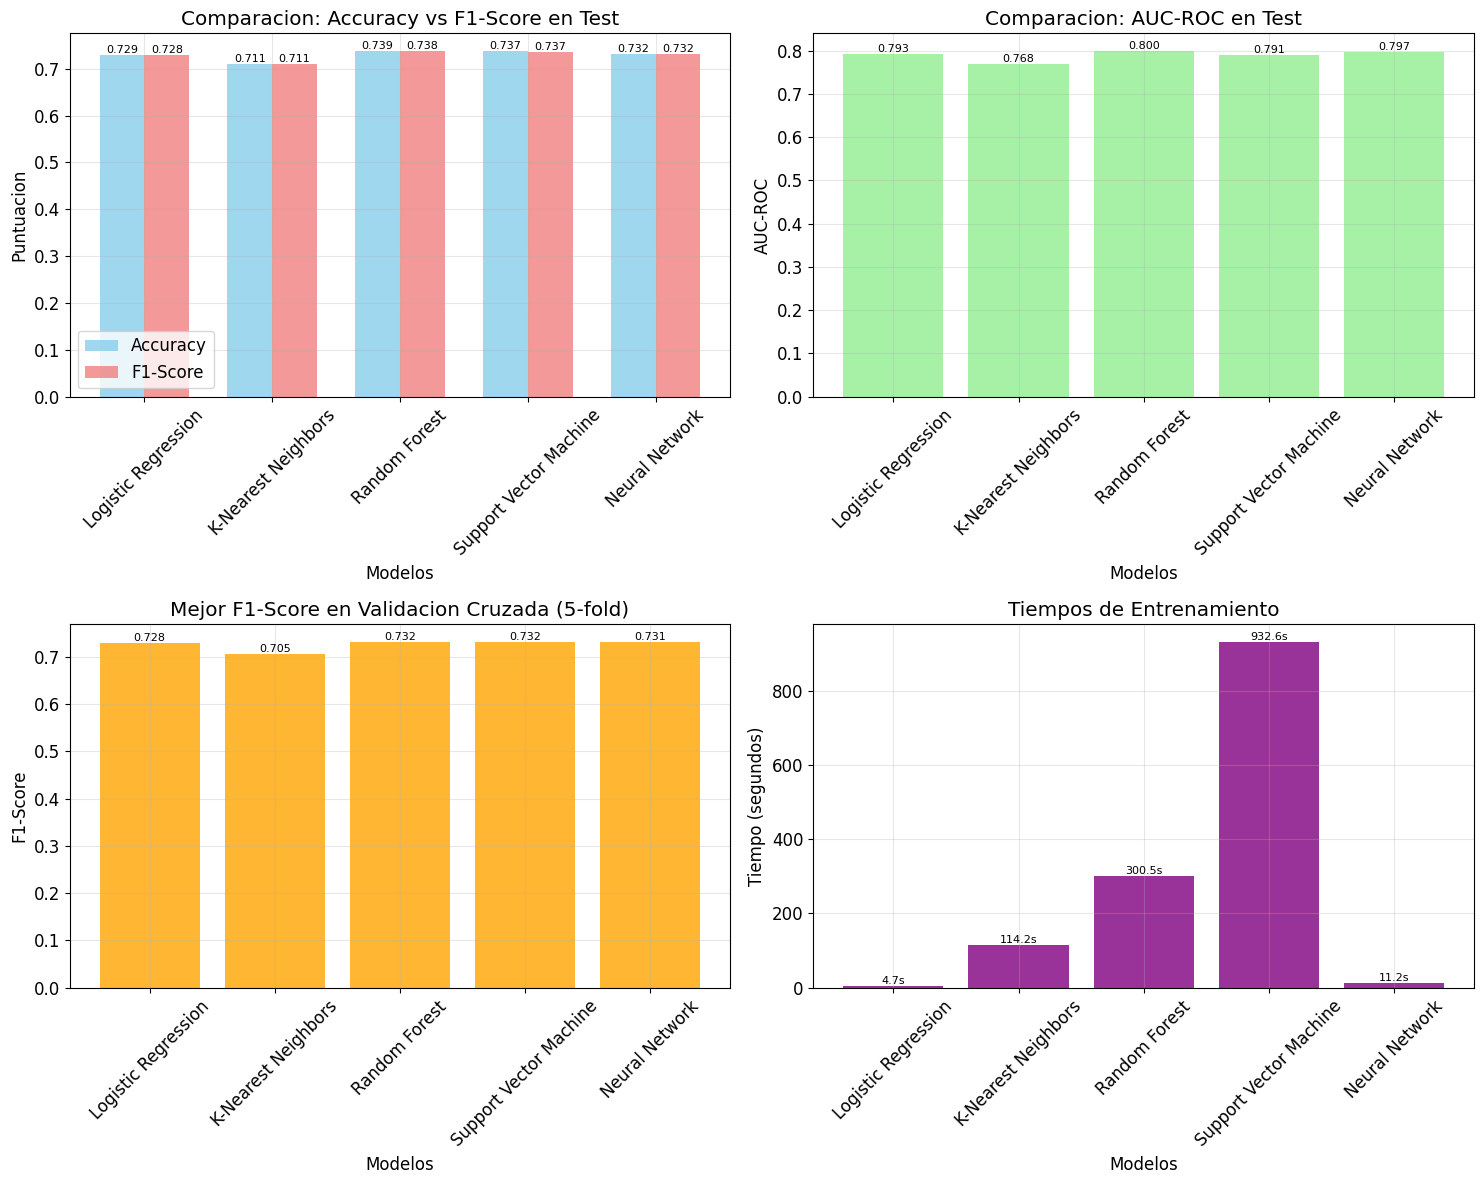

GRAFICAS GENERADAS EXITOSAMENTE


In [ ]:
if len(results) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Grafico 1: Comparacion de Accuracy y F1-Score
    models_names = list(results.keys())
    test_accuracies = [results[name]['test_accuracy'] for name in models_names]
    test_f1_scores = [results[name]['test_f1'] for name in models_names]

    x = np.arange(len(models_names))
    width = 0.35

    bars1 = axes[0,0].bar(x - width/2, test_accuracies, width, label='Accuracy', alpha=0.8, color='skyblue')
    bars2 = axes[0,0].bar(x + width/2, test_f1_scores, width, label='F1-Score', alpha=0.8, color='lightcoral')
    axes[0,0].set_xlabel('Modelos')
    axes[0,0].set_ylabel('Puntuacion')
    axes[0,0].set_title('Comparacion: Accuracy vs F1-Score en Test')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels(models_names, rotation=45)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # Añadir valores en las barras
    for bar in bars1 + bars2:
        height = bar.get_height()
        axes[0,0].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.3f}', ha='center', va='bottom', fontsize=8)

    # Grafico 2: Comparacion de AUC-ROC
    models_with_proba = [name for name in models_names if results[name]['test_auc'] is not None]
    if models_with_proba:
        auc_scores = [results[name]['test_auc'] for name in models_with_proba]
        bars = axes[0,1].bar(models_with_proba, auc_scores, color='lightgreen', alpha=0.8)
        axes[0,1].set_xlabel('Modelos')
        axes[0,1].set_ylabel('AUC-ROC')
        axes[0,1].set_title('Comparacion: AUC-ROC en Test')
        axes[0,1].tick_params(axis='x', rotation=45)
        axes[0,1].grid(True, alpha=0.3)

        # Añadir valores en las barras
        for bar in bars:
            height = bar.get_height()
            axes[0,1].text(bar.get_x() + bar.get_width()/2., height,
                          f'{height:.3f}', ha='center', va='bottom', fontsize=8)

    # Grafico 3: Puntuaciones de validacion cruzada
    cv_scores = [results[name]['best_score'] for name in models_names]
    bars = axes[1,0].bar(models_names, cv_scores, color='orange', alpha=0.8)
    axes[1,0].set_xlabel('Modelos')
    axes[1,0].set_ylabel('F1-Score')
    axes[1,0].set_title('Mejor F1-Score en Validacion Cruzada (5-fold)')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(True, alpha=0.3)

    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        axes[1,0].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.3f}', ha='center', va='bottom', fontsize=8)

    # Grafico 4: Tiempos de entrenamiento
    times = [results[name]['training_time'] for name in models_names]
    bars = axes[1,1].bar(models_names, times, color='purple', alpha=0.8)
    axes[1,1].set_xlabel('Modelos')
    axes[1,1].set_ylabel('Tiempo (segundos)')
    axes[1,1].set_title('Tiempos de Entrenamiento')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].grid(True, alpha=0.3)

    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.1f}s', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

    print("GRAFICAS GENERADAS EXITOSAMENTE")
else:
    print("No hay resultados para graficar")

### Resumen del entrenamiento

In [ ]:
if len(results_df) > 0:
    # Ordenar por F1-Score
    results_sorted = results_df.sort_values('Test F1', ascending=False)

    print("\nRANKING DE MODELOS (por F1-Score en Test):")
    print("-" * 45)
    for i, (idx, row) in enumerate(results_sorted.iterrows(), 1):
        print(f"{i:2d}. {row['Modelo']:25} - F1: {row['Test F1']:.4f} - Acc: {row['Test Accuracy']:.4f}")

    # Mejor modelo
    best_row = results_sorted.iloc[0]
    print(f"\nMEJOR MODELO: {best_row['Modelo']}")
    print(f"   F1-Score: {best_row['Test F1']:.4f}")
    print(f"   Accuracy: {best_row['Test Accuracy']:.4f}")
    print(f"   AUC-ROC: {best_row['Test AUC']:.4f}")

    # Analisis de sobreajuste
    print(f"\nANALISIS DE SOBREAJUSTE:")
    for name in results.keys():
        train_score = results[name]['best_score']  # Mejor score en CV
        test_score = results[name]['test_f1']
        overfitting = train_score - test_score
        print(f"   {name:25}: {overfitting:+.4f} (CV: {train_score:.4f} - Test: {test_score:.4f})")

    # Metricas generales
    print(f"\nMETRICAS GENERALES:")
    print(f"   Modelos entrenados exitosamente: {len(results)}")
    print(f"   Rango F1-Score: {results_df['Test F1'].min():.4f} - {results_df['Test F1'].max():.4f}")
    print(f"   Rango Accuracy: {results_df['Test Accuracy'].min():.4f} - {results_df['Test Accuracy'].max():.4f}")
    print(f"   Tiempo total entrenamiento: {sum(training_times.values()):.2f} segundos")

print("\nMODELOS ENTRENADOS Y EVALUADOS")
print("=" * 60)
print("RESUMEN:")
print(f"   Modelos evaluados: {len(results)}")
print(f"   Mejor modelo: {best_model_name if 'best_model_name' in locals() else 'N/A'}")
print(f"   Mejor F1-Score: {best_test_f1 if 'best_test_f1' in locals() else 'N/A':.4f}")
print(f"   Balance dataset: Perfecto (50%-50%)")
print(f"   Validacion: 5-fold estratificado")


RANKING DE MODELOS (por F1-Score en Test):
---------------------------------------------
 1. Random Forest             - F1: 0.7381 - Acc: 0.7385
 2. Support Vector Machine    - F1: 0.7366 - Acc: 0.7370
 3. Neural Network            - F1: 0.7317 - Acc: 0.7318
 4. Logistic Regression       - F1: 0.7284 - Acc: 0.7292
 5. K-Nearest Neighbors       - F1: 0.7109 - Acc: 0.7110

MEJOR MODELO: Random Forest
   F1-Score: 0.7381
   Accuracy: 0.7385
   AUC-ROC: 0.7998

ANALISIS DE SOBREAJUSTE:
   Logistic Regression      : -0.0000 (CV: 0.7284 - Test: 0.7284)
   K-Nearest Neighbors      : -0.0059 (CV: 0.7049 - Test: 0.7109)
   Random Forest            : -0.0065 (CV: 0.7315 - Test: 0.7381)
   Support Vector Machine   : -0.0048 (CV: 0.7318 - Test: 0.7366)
   Neural Network           : -0.0009 (CV: 0.7308 - Test: 0.7317)

METRICAS GENERALES:
   Modelos entrenados exitosamente: 5
   Rango F1-Score: 0.7109 - 0.7381
   Rango Accuracy: 0.7110 - 0.7385
   Tiempo total entrenamiento: 1363.20 segundos

MOD

## 5 Reduccion de Dimension

### Analisis de los componentes PCA

VARIANZA EXPLICADA POR COMPONENTES PRINCIPALES:
--------------------------------------------------
   Componente  1: 0.318 (0.318 acumulada)
   Componente  2: 0.205 (0.523 acumulada)
   Componente  3: 0.144 (0.667 acumulada)
   Componente  4: 0.109 (0.776 acumulada)
   Componente  5: 0.081 (0.857 acumulada)
   Componente  6: 0.041 (0.898 acumulada)
   Componente  7: 0.032 (0.931 acumulada)
   Componente  8: 0.026 (0.957 acumulada)
   Componente  9: 0.025 (0.982 acumulada)
   Componente 10: 0.012 (0.994 acumulada)
   Componente 11: 0.006 (1.000 acumulada)

COMPONENTES NECESARIOS PARA:
   85% de varianza: 5 componentes
   90% de varianza: 7 componentes
   95% de varianza: 8 componentes

CRITERIO SELECCIONADO: 7 componentes (90% varianza)
REDUCCION: 11 -> 7 variables
PORCENTAJE REDUCCION: 36.4%


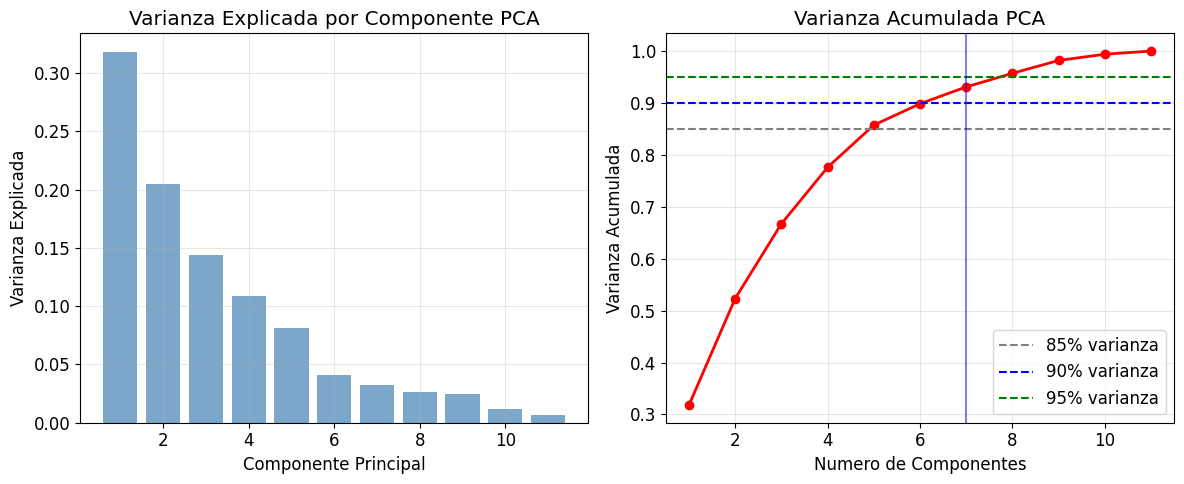


PCA APLICADO EXITOSAMENTE:
   Dimensiones entrenamiento: (16000, 7)
   Dimensiones prueba: (4000, 7)


In [ ]:
# Aplicar PCA para analizar varianza explicada
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

# Analisis de varianza explicada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("VARIANZA EXPLICADA POR COMPONENTES PRINCIPALES:")
print("-" * 50)
for i, (var_individual, var_acum) in enumerate(zip(varianza_explicada, varianza_acumulada), 1):
    print(f"   Componente {i:2d}: {var_individual:.3f} ({var_acum:.3f} acumulada)")

# Determinar numero optimo de componentes
n_componentes_85 = np.argmax(varianza_acumulada >= 0.85) + 1
n_componentes_90 = np.argmax(varianza_acumulada >= 0.90) + 1
n_componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1

print(f"\nCOMPONENTES NECESARIOS PARA:")
print(f"   85% de varianza: {n_componentes_85} componentes")
print(f"   90% de varianza: {n_componentes_90} componentes")
print(f"   95% de varianza: {n_componentes_95} componentes")

# Elegir criterio: 90% de varianza
n_componentes_pca = n_componentes_90
print(f"\nCRITERIO SELECCIONADO: {n_componentes_pca} componentes (90% varianza)")
print(f"REDUCCION: {X_train_scaled.shape[1]} -> {n_componentes_pca} variables")
print(f"PORCENTAJE REDUCCION: {((X_train_scaled.shape[1] - n_componentes_pca)/X_train_scaled.shape[1]*100):.1f}%")

# Grafico de varianza explicada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, color='steelblue')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente PCA')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, 'o-', color='red', linewidth=2)
plt.axhline(y=0.85, color='gray', linestyle='--', label='85% varianza')
plt.axhline(y=0.90, color='blue', linestyle='--', label='90% varianza')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% varianza')
plt.axvline(x=n_componentes_90, color='blue', linestyle='-', alpha=0.5)
plt.xlabel('Numero de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada PCA')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Aplicar PCA con numero seleccionado de componentes
pca_final = PCA(n_components=n_componentes_pca)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

print(f"\nPCA APLICADO EXITOSAMENTE:")
print(f"   Dimensiones entrenamiento: {X_train_pca.shape}")
print(f"   Dimensiones prueba: {X_test_pca.shape}")

### Evaluacion de los modelos por PCA

In [ ]:
# Tomar los 2 mejores modelos de la seccion 4
if len(results) >= 2:
    # Ordenar modelos por F1-Score y tomar los 2 mejores
    modelos_ordenados = sorted(results.items(), key=lambda x: x[1]['test_f1'], reverse=True)
    mejores_modelos = {name: results[name] for name, _ in modelos_ordenados[:2]}

    print("MODELOS SELECCIONADOS PARA EVALUACION CON PCA:")
    for name in mejores_modelos.keys():
        print(f"   • {name}")
else:
    # Si no hay resultados, usar modelos por defecto
    mejores_modelos = {
        'Random Forest': results.get('Random Forest', None),
        'Neural Network': results.get('Neural Network', None)
    }
    print("USANDO MODELOS POR DEFECTO PARA EVALUACION CON PCA")

resultados_pca = {}

for model_name, model_info in mejores_modelos.items():
    if model_info is None:
        continue

    print(f"\nEVALUANDO {model_name} CON PCA...")

    # Clonar el mejor modelo con sus parametros optimos
    from sklearn.base import clone
    model_pca = clone(model_info['best_model'])

    # Entrenar con caracteristicas PCA
    model_pca.fit(X_train_pca, y_train)

    # Predicciones
    y_pred_pca = model_pca.predict(X_test_pca)
    y_pred_proba_pca = model_pca.predict_proba(X_test_pca)[:, 1] if hasattr(model_pca, "predict_proba") else None

    # Metricas
    test_accuracy_pca = accuracy_score(y_test, y_pred_pca)
    test_f1_pca = f1_score(y_test, y_pred_pca, average='macro')
    test_auc_pca = roc_auc_score(y_test, y_pred_proba_pca) if y_pred_proba_pca is not None else None

    resultados_pca[model_name] = {
        'test_accuracy': test_accuracy_pca,
        'test_f1': test_f1_pca,
        'test_auc': test_auc_pca
    }

    print(f"   Test Accuracy: {test_accuracy_pca:.4f}")
    print(f"   Test F1: {test_f1_pca:.4f}")
    if test_auc_pca:
        print(f"   Test AUC: {test_auc_pca:.4f}")

    # Comparar con resultados originales
    diff_accuracy = test_accuracy_pca - model_info['test_accuracy']
    diff_f1 = test_f1_pca - model_info['test_f1']
    print(f"   Diferencia vs original: Accuracy {diff_accuracy:+.4f}, F1 {diff_f1:+.4f}")

print(f"\nEVALUACION CON PCA COMPLETADA")

MODELOS SELECCIONADOS PARA EVALUACION CON PCA:
   • Random Forest
   • Support Vector Machine

EVALUANDO Random Forest CON PCA...
   Test Accuracy: 0.7332
   Test F1: 0.7331
   Test AUC: 0.7924
   Diferencia vs original: Accuracy -0.0053, F1 -0.0050

EVALUANDO Support Vector Machine CON PCA...
   Test Accuracy: 0.7362
   Test F1: 0.7357
   Diferencia vs original: Accuracy -0.0008, F1 -0.0008

EVALUACION CON PCA COMPLETADA


### Reduccion no lineal usando UMAP

In [ ]:
# Probar UMAP con el mismo numero de componentes que PCA
componentes_umap = [n_componentes_pca]

resultados_umap = {}

for n_components in componentes_umap:
    print(f"APLICANDO UMAP CON {n_components} COMPONENTES...")

    # Aplicar UMAP
    reducer = umap.UMAP(n_components=n_components, random_state=42, n_neighbors=15, min_dist=0.1)
    X_train_umap = reducer.fit_transform(X_train_scaled)
    X_test_umap = reducer.transform(X_test_scaled)

    print(f"   Dimensiones entrenamiento: {X_train_umap.shape}")
    print(f"   Dimensiones prueba: {X_test_umap.shape}")

    # Evaluar modelos con UMAP
    resultados_umap_components = {}

    for model_name, model_info in mejores_modelos.items():
        if model_info is None:
            continue

        print(f"   EVALUANDO {model_name} CON UMAP...")

        # Clonar modelo
        from sklearn.base import clone
        model_umap = clone(model_info['best_model'])

        # Entrenar con caracteristicas UMAP
        model_umap.fit(X_train_umap, y_train)

        # Predicciones
        y_pred_umap = model_umap.predict(X_test_umap)
        y_pred_proba_umap = model_umap.predict_proba(X_test_umap)[:, 1] if hasattr(model_umap, "predict_proba") else None

        # Metricas
        test_accuracy_umap = accuracy_score(y_test, y_pred_umap)
        test_f1_umap = f1_score(y_test, y_pred_umap, average='macro')
        test_auc_umap = roc_auc_score(y_test, y_pred_proba_umap) if y_pred_proba_umap is not None else None

        resultados_umap_components[model_name] = {
            'test_accuracy': test_accuracy_umap,
            'test_f1': test_f1_umap,
            'test_auc': test_auc_umap
        }

        print(f"      Test Accuracy: {test_accuracy_umap:.4f}")
        print(f"      Test F1: {test_f1_umap:.4f}")
        if test_auc_umap:
            print(f"      Test AUC: {test_auc_umap:.4f}")

        # Comparar con resultados originales
        diff_accuracy = test_accuracy_umap - model_info['test_accuracy']
        diff_f1 = test_f1_umap - model_info['test_f1']
        print(f"      Diferencia vs original: Accuracy {diff_accuracy:+.4f}, F1 {diff_f1:+.4f}")

    resultados_umap[n_components] = resultados_umap_components

print(f"\nEVALUACION CON UMAP COMPLETADA")

APLICANDO UMAP CON 7 COMPONENTES...
   Dimensiones entrenamiento: (16000, 7)
   Dimensiones prueba: (4000, 7)
   EVALUANDO Random Forest CON UMAP...
      Test Accuracy: 0.7255
      Test F1: 0.7253
      Test AUC: 0.7864
      Diferencia vs original: Accuracy -0.0130, F1 -0.0128
   EVALUANDO Support Vector Machine CON UMAP...
      Test Accuracy: 0.7145
      Test F1: 0.7138
      Diferencia vs original: Accuracy -0.0225, F1 -0.0227

EVALUACION CON UMAP COMPLETADA


### Comparar las tecnicas de reduccion

In [ ]:
# Resultados originales (sin reduccion)
resultados_originales = {}
for model_name in mejores_modelos.keys():
    if model_name in results:
        resultados_originales[model_name] = {
            'accuracy': results[model_name]['test_accuracy'],
            'f1': results[model_name]['test_f1'],
            'auc': results[model_name]['test_auc']
        }

# Crear tabla comparativa
comparativa_data = []

for model_name in mejores_modelos.keys():
    if model_name not in resultados_originales:
        continue

    # Original
    comparativa_data.append({
        'Modelo': model_name,
        'Tecnica': 'Original',
        'Caracteristicas': X_train_scaled.shape[1],
        'Accuracy': resultados_originales[model_name]['accuracy'],
        'F1-Score': resultados_originales[model_name]['f1'],
        'AUC-ROC': resultados_originales[model_name]['auc']
    })

    # PCA
    if model_name in resultados_pca:
        comparativa_data.append({
            'Modelo': model_name,
            'Tecnica': f'PCA ({n_componentes_pca} comp)',
            'Caracteristicas': n_componentes_pca,
            'Accuracy': resultados_pca[model_name]['test_accuracy'],
            'F1-Score': resultados_pca[model_name]['test_f1'],
            'AUC-ROC': resultados_pca[model_name]['test_auc']
        })

    # UMAP
    for n_comp in resultados_umap.keys():
        if model_name in resultados_umap[n_comp]:
            comparativa_data.append({
                'Modelo': model_name,
                'Tecnica': f'UMAP ({n_comp} comp)',
                'Caracteristicas': n_comp,
                'Accuracy': resultados_umap[n_comp][model_name]['test_accuracy'],
                'F1-Score': resultados_umap[n_comp][model_name]['test_f1'],
                'AUC-ROC': resultados_umap[n_comp][model_name]['test_auc']
            })

comparativa_df = pd.DataFrame(comparativa_data)
print("COMPARATIVA FINAL - TECNICAS DE REDUCCION")
print("-" * 50)
print(comparativa_df.round(4))

# Analisis de la mejor tecnica
print(f"\nANALISIS COMPARATIVO:")
for model_name in mejores_modelos.keys():
    if model_name not in resultados_originales:
        continue

    model_data = comparativa_df[comparativa_df['Modelo'] == model_name]
    if len(model_data) > 0:
        best_technique = model_data.loc[model_data['F1-Score'].idxmax()]
        original_f1 = resultados_originales[model_name]['f1']

        print(f"\n{model_name}:")
        print(f"   Mejor tecnica: {best_technique['Tecnica']}")
        print(f"   Mejor F1-Score: {best_technique['F1-Score']:.4f}")
        print(f"   Reduccion: {X_train_scaled.shape[1]} -> {best_technique['Caracteristicas']} caracteristicas")
        print(f"   Diferencia vs Original: {best_technique['F1-Score'] - original_f1:+.4f}")

COMPARATIVA FINAL - TECNICAS DE REDUCCION
--------------------------------------------------
                   Modelo        Tecnica  Caracteristicas  Accuracy  F1-Score  \
0           Random Forest       Original               11    0.7385    0.7381   
1           Random Forest   PCA (7 comp)                7    0.7332    0.7331   
2           Random Forest  UMAP (7 comp)                7    0.7255    0.7253   
3  Support Vector Machine       Original               11    0.7370    0.7366   
4  Support Vector Machine   PCA (7 comp)                7    0.7362    0.7357   
5  Support Vector Machine  UMAP (7 comp)                7    0.7145    0.7138   

   AUC-ROC  
0   0.7998  
1   0.7924  
2   0.7864  
3   0.7907  
4      NaN  
5      NaN  

ANALISIS COMPARATIVO:

Random Forest:
   Mejor tecnica: Original
   Mejor F1-Score: 0.7381
   Reduccion: 11 -> 11 caracteristicas
   Diferencia vs Original: +0.0000

Support Vector Machine:
   Mejor tecnica: Original
   Mejor F1-Score: 0.7366
   R

### Visualizacion de la comparacion

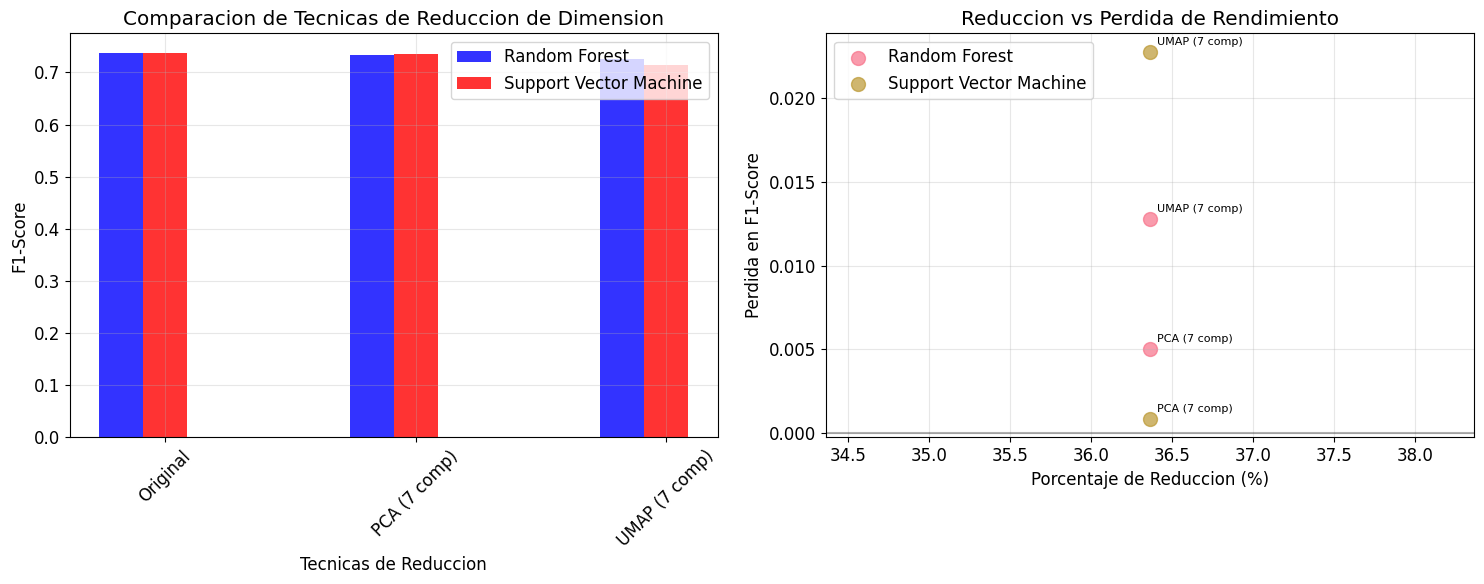

GRAFICAS COMPARATIVAS GENERADAS


In [ ]:
if len(comparativa_df) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Grafico 1: Comparacion de F1-Score por tecnica
    techniques = comparativa_df['Tecnica'].unique()
    x = np.arange(len(techniques))
    width = 0.35

    # Colores para diferentes modelos
    colors = ['blue', 'red', 'green', 'orange', 'purple']

    for i, model_name in enumerate(mejores_modelos.keys()):
        if model_name not in resultados_originales:
            continue

        model_data = comparativa_df[comparativa_df['Modelo'] == model_name]
        f1_scores = [model_data[model_data['Tecnica'] == tech]['F1-Score'].values[0] for tech in techniques]

        axes[0].bar(x + i*width/len(mejores_modelos), f1_scores,
                   width/len(mejores_modelos), label=model_name,
                   color=colors[i % len(colors)], alpha=0.8)

    axes[0].set_xlabel('Tecnicas de Reduccion')
    axes[0].set_ylabel('F1-Score')
    axes[0].set_title('Comparacion de Tecnicas de Reduccion de Dimension')
    axes[0].set_xticks(x + width/2)
    axes[0].set_xticklabels(techniques, rotation=45)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Grafico 2: Porcentaje de reduccion vs perdida de rendimiento
    reduccion_perdida_data = []
    for _, row in comparativa_df.iterrows():
        if row['Tecnica'] != 'Original':
            original_f1 = comparativa_df[
                (comparativa_df['Modelo'] == row['Modelo']) &
                (comparativa_df['Tecnica'] == 'Original')
            ]['F1-Score'].values[0]

            perdida_f1 = original_f1 - row['F1-Score']
            porcentaje_reduccion = ((X_train_scaled.shape[1] - row['Caracteristicas']) / X_train_scaled.shape[1]) * 100

            reduccion_perdida_data.append({
                'Modelo': row['Modelo'],
                'Tecnica': row['Tecnica'],
                'Reduccion': porcentaje_reduccion,
                'Perdida_F1': perdida_f1
            })

    if reduccion_perdida_data:
        reduccion_df = pd.DataFrame(reduccion_perdida_data)

        for model_name in reduccion_df['Modelo'].unique():
            model_reduccion = reduccion_df[reduccion_df['Modelo'] == model_name]
            axes[1].scatter(model_reduccion['Reduccion'], model_reduccion['Perdida_F1'],
                           label=model_name, s=100, alpha=0.7)

            # Anotar puntos
            for _, point in model_reduccion.iterrows():
                axes[1].annotate(point['Tecnica'],
                               (point['Reduccion'], point['Perdida_F1']),
                               xytext=(5, 5), textcoords='offset points',
                               fontsize=8)

        axes[1].set_xlabel('Porcentaje de Reduccion (%)')
        axes[1].set_ylabel('Perdida en F1-Score')
        axes[1].set_title('Reduccion vs Perdida de Rendimiento')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("GRAFICAS COMPARATIVAS GENERADAS")
else:
    print("No hay datos suficientes para generar graficas comparativas")

### Resumen de la reduccion

In [ ]:
if len(comparativa_df) > 0:
    # Analizar si la reduccion es beneficiosa
    mejoras_con_reduccion = 0
    for model_name in mejores_modelos.keys():
        model_data = comparativa_df[comparativa_df['Modelo'] == model_name]
        if len(model_data) > 1:  # Tiene al menos original y una tecnica de reduccion
            original_f1 = model_data[model_data['Tecnica'] == 'Original']['F1-Score'].values[0]
            mejor_reduccion_f1 = model_data[model_data['Tecnica'] != 'Original']['F1-Score'].max()

            if mejor_reduccion_f1 > original_f1:
                mejoras_con_reduccion += 1
                print(f"   {model_name}: MEJORA con reduccion (+{mejor_reduccion_f1 - original_f1:.4f})")
            else:
                print(f"   {model_name}: SIN MEJORA con reduccion ({mejor_reduccion_f1 - original_f1:+.4f})")

    print(f"\nRESUMEN:")
    print(f"   Modelos que mejoran con reduccion: {mejoras_con_reduccion}/{len(mejores_modelos)}")
    print(f"   Componentes PCA optimos: {n_componentes_pca} (90% varianza)")
    print(f"   Reduccion alcanzada: {((X_train_scaled.shape[1] - n_componentes_pca)/X_train_scaled.shape[1]*100):.1f}%")

    # Recomendacion final
    if mejoras_con_reduccion > 0:
        print(f"   RECOMENDACION: Considerar uso de reduccion de dimension")
    else:
        print(f"   RECOMENDACION: Mantener todas las variables originales")
else:
    print("No hay datos suficientes para conclusiones")

print("\nSECCION 5 COMPLETADA - REDUCCION DE DIMENSION EVALUADA")
print("=" * 60)
print("RESUMEN:")
print(f"   Tecnicas evaluadas: PCA, UMAP")
print(f"   Modelos evaluados: {len(mejores_modelos)}")
print(f"   Componentes PCA: {n_componentes_pca} (90% varianza)")
print(f"   Reduccion maxima: {((X_train_scaled.shape[1] - n_componentes_pca)/X_train_scaled.shape[1]*100):.1f}%")
print("=" * 60)

   Random Forest: SIN MEJORA con reduccion (-0.0050)
   Support Vector Machine: SIN MEJORA con reduccion (-0.0008)

RESUMEN:
   Modelos que mejoran con reduccion: 0/2
   Componentes PCA optimos: 7 (90% varianza)
   Reduccion alcanzada: 36.4%
   RECOMENDACION: Mantener todas las variables originales

SECCION 5 COMPLETADA - REDUCCION DE DIMENSION EVALUADA
RESUMEN:
   Tecnicas evaluadas: PCA, UMAP
   Modelos evaluados: 2
   Componentes PCA: 7 (90% varianza)
   Reduccion maxima: 36.4%
